# **Проект: Обучение с учителем: качество модели**

**Описание проекта:**

Интернет-магазин «В один клик» продаёт различные товары: для детей, для дома, мелкую бытовую технику, косметику, а также продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не настолько эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений. Руководство компании "В один клик" планирует принимать решения по данным вопросам только на основе анализа данных и бизнес-моделирования, в связи с чем необходимо разработать концепцию, которая позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Цель проекта:**
 
Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.  

**Описание данных**  

Файл `market_file.csv` содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.  

- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
= `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.  

Файл `market_money.csv` содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.  

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.

Файл `market_time.csv` содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.  

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.  

Файл `money.csv` содержит данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.  

- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.  

**Этапы исследования:**  

1. Загрузка и изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение таблиц
5. Корреляционный анализ
6. Использование Пайплайнов
7. Анализ важности признаков
8. Сегментация покупателей
9. Общий вывод



In [1]:
!pip install phik shap -q

In [2]:
try:
    import phik, shap
    print("Библиотеки успешно установлены!")
except ImportError as e:
    print("Ошибка установки:", e)

Библиотеки успешно установлены!


In [3]:
#%pip install -q missingno phik matplotlib==3.9.4 shap==0.47.2 scikit-learn==1.6.1 seaborn==0.13.2 shap==0.47.2
!pip install matplotlib==3.9.4 scikit-learn==1.6.1 seaborn==0.13.2 -q

# !pip install scikit-learn==1.1.3 -q и !pip install matplotlib==3.5.2 -q.
# !pip install scikit-learn==1.1.3 -q и !pip install matplotlib==3.5.2 -q.

In [4]:
try:
    import matplotlib, seaborn, sklearn
    print("Библиотеки успешно установлены!")
except ImportError as e:
    print("Ошибка установки:", e)

Библиотеки успешно установлены!


In [5]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.multiclass import type_of_target

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score, 
    f1_score, 
    roc_curve, 
    roc_auc_score
)

from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    RandomizedSearchCV
) 

from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler,
    OneHotEncoder,
    LabelEncoder, 
    OrdinalEncoder    
)

from sklearn.feature_selection import (
    SelectKBest, 
    f_classif, 
    mutual_info_classif
) 

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from scipy import stats, optimize, interpolate
import scipy.stats.mvn
from phik.report import plot_correlation_matrix
shap.plots.initjs()


## **Загрузка и изучение данных**

In [6]:
# Загружаем данные

market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=",")

<u>Датафрейм `market_file`<u>

In [7]:
# Смотрим первые строки датафрейма `market_file`  
market_file.head(10)

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   
5  215353                 Снизилась   стандартт                 да   
6  215354                 Снизилась   стандартт                 да   
7  215355                 Снизилась   стандартт                нет   
8  215356                 Снизилась   стандартт                 да   
9  215357                 Снизилась   стандартт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   
6                 5.1                     3           431               0.23   
7                 4.7                     4           284               0.17   
8                 4.2                     4           192               0.14   
9                 3.9                     5           154               0.00   

             Популярная_категория  Средний_просмотр_категорий_за_визит  \
0                Товары для детей                                    6   
1                Товары для детей                                    4   
2               Домашний текстиль                                    5   
3                Товары для детей                                    5   
4                Товары для детей                                    3   
5               Домашний текстиль                                    4   
6           Косметика и аксесуары                                    2   
7                Товары для детей                                    5   
8           Косметика и аксесуары                                    2   
9  Техника для красоты и здоровья                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4  
6                                   3               7                 2  
7                                   1               6                 4  
8                                   2               1                 3  
9                                   3               9                 5

In [8]:
# Выведем общую информацию о датафрейме `market_file` с помощью метода info()
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Мы видим, что датафрейм `market_file` состоит из 13 столбцов, в которых находятся данные с типами object, int64 и  float64. Общее количество индексов в таблице составляет 1300, и такие же количества ненулевых значений во всех столбцах, поэтому предположим, что данные не содержат пропусков.
Названия некоторых столбцов содержат пробелы, что надо будет скорректировать в дальнейшем.

<u>Датафрейм `market_money`<u>

In [9]:
# Смотрим первые строки датафрейма `market_money`  
market_money.head(10)

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0
7  215350        текущий_месяц   5058.4
8  215350     предыдущий_месяц   5457.5
9  215351        текущий_месяц   6610.4

In [10]:
# Выведем общую информацию о датафрейме `market_money` с помощью метода info()
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Датафрейм market_money состоит из 3 столбцов, в которых находятся данные с типами object и int64. Общее количество индексов в таблице составляет 3900, и такие же количества ненулевых значений во всех столбцах, поэтому пока также предположим, что эти данные не содержат пропусков. 


<u>Датафрейм `market_time`<u>

In [11]:
# Смотрим первые строки датафрейма `market_time`  
market_time.head(10)

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13
5  215350  предыдцщий_месяц      8
6  215351     текущий_месяц     13
7  215351  предыдцщий_месяц     11
8  215352     текущий_месяц     11
9  215352  предыдцщий_месяц      8

In [12]:
# Выведем общую информацию о датафрейме `market_time` с помощью метода info()
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Датафрейм `market_time` состоит из 3 столбцов, в которых находятся данные с типами object и int64. Общее количество индексов в таблице составляет 2600, и такие же количества ненулевых значений во всех столбцах, поэтому и в этом случае предположим, что эти данные не содержат пропусков.  


<u>Датафрейм `money`<u>

In [13]:
# Смотрим первые строки датафрейма `money`  
money.head(10)

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21
5  215353     3.95
6  215354     3.62
7  215355     5.26
8  215356     4.93
9  215357     4.66

In [14]:
# Выведем общую информацию о датафрейме `money` с помощью метода info()
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Датафрейм `money` состоит из 2 столбцов, в которых находятся данные с типами float64 и int64. Общее количество индексов в таблице составляет 1300, и такие же количества ненулевых значений во всех столбцах, и в данном случае также предположим, что  пропуски отсутствуют.
Привлекают внимание данные в столбце Прибыль, выраженные, по-видимому, в тысячах рублей, в то время как данные о выручке в датафрейме `market_money` явно показаны в рублях. Полагаю нужным в дальнейшем привести их в соответствие. 


**Выводы после первичного просмотра наборов данных:**

- Для исследовательской работы были загружены все четыре таблицы.
- В таблицах не наблюдается пропусков.
- Наименования некоторых столбцов нужно скорректировать и привести к "змеиному" виду.
- Видится необходимым привести в соответствие данные по прибыли и выручке.


## **Предобработка данных**

### Приведение наименований столбцов к "змеиному" виду

In [15]:
def snake_case(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')    

In [16]:
snake_case(market_file)
snake_case(market_money)
snake_case(market_time)
snake_case(money)

In [17]:
# Проверим
for с in [market_file, market_money, market_time, money]:
    print(с.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


### Изучение и обработка пропущенных значений

In [18]:
# Проверим наличие пропусков в `market_file`
market_file.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [19]:
# Проверим наличие пропусков в `market_money`
market_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

In [20]:
# Проверим наличие пропусков в `market_time`
market_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

Пропуски отсутствуют.

### Изучение и обработка дубликатов

In [21]:
# Проверим наличие дубликатов в датафреймах
for i in [market_file, market_money, market_time, money]:
    print(i.duplicated().sum())

0
0
0
0


В датасетах явных дубликатов не имеется.

*Неявные дубликаты*

В `market_file`

In [22]:
for col in market_file.columns:
    if market_file[col].dtype == 'object':
        print(f'Столбец {col} - уникальные значения: {market_file[col].unique()}')

Столбец покупательская_активность - уникальные значения: ['Снизилась' 'Прежний уровень']
Столбец тип_сервиса - уникальные значения: ['премиум' 'стандартт' 'стандарт']
Столбец разрешить_сообщать - уникальные значения: ['да' 'нет']
Столбец популярная_категория - уникальные значения: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


В столбце 'тип_сервиса' произведем замену 'стандартт' на 'стандарт'.  
В столбце 'популярная_категория' исправим слово "аксесcуары".

In [23]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace(['стандартт'],'стандарт')
market_file['популярная_категория'] = market_file['популярная_категория'].replace(
    ['Косметика и аксесуары'],'Косметика и аксесcуары')

In [24]:
# Проверим после замены столбец 'тип_сервиса'
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [25]:
# Проверим после замены столбец 'популярная_категория'
market_file['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесcуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

В `market_money`

In [26]:
for col in market_money.columns:
    if market_money[col].dtype == 'object':
        print(f'Столбец {col} - уникальные значения: {market_money[col].unique()}')

Столбец период - уникальные значения: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


В `market_time`

In [27]:
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Произведем замену 'предыдцщий_месяц' на 'предыдущий_месяц'.

In [28]:
market_time['период'] = market_time['период'].replace(['предыдцщий_месяц'],'предыдущий_месяц')

In [29]:
# Проверим после замены 
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

### Обработка значений Прибыли в датафрейме `money`

Как уже упоминалось ранее, данные в столбце прибыль в датафрейме `money` выражены в тысячах рублей, в то время как данные о выручке в датафрейме `market_money` показаны в рублях. Выразим данные столбца прибыль тоже в рублях.

In [30]:
money['прибыль'] = money['прибыль'] * 1000

In [31]:
# Проверим
money.head(10)

id  прибыль
0  215348    980.0
1  215349   4160.0
2  215350   3130.0
3  215351   4870.0
4  215352   4210.0
5  215353   3950.0
6  215354   3620.0
7  215355   5260.0
8  215356   4930.0
9  215357   4660.0

Итоги по предобработке данных:

- Наименования столбцов были приведены к "змеиному" виду.
- Данные были проверены на наличие пропусков. Пропущенных значений в данных нет.
- Были изучены и обработаны дубликаты.  
- Были обработаны значения в столбце `прибыль` датасета `money`.

## Исследовательский анализ данных

### Проведение статистического анализа всех признаков.
### Построение графиков для каждого признака.

Создадим функции для построения графиков:  

- столбчатых и круговых диаграмм для категориальных признаков  
- гистограмм и диаграммы размаха для количественных признаков

In [32]:
# Функция построения графиков для числовых признаков

def num_plot(data, x, xlabel, ylabel, hue=None):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.histplot(
        data=data,
        x=x,
        hue=hue,
        ax=axes[0],
        stat="density",
        kde=True
    )
    axes[0].set_title(f'Гистограмма по {xlabel}')
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)

    sns.boxplot(
        data=data,
        x=x,
        ax=axes[1]
    )
    axes[1].set_title(f'Диаграмма размаха {xlabel}')
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()

In [33]:
# Функция построения диаграмм для категориальных признаков
def cat_plot(data, x, xlabel, hue=None):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.countplot(
        data=data,
        x=x,
        hue=hue,
        ax=axes[0]
    )
    axes[0].set_title(f'Диаграмма по {xlabel}')
    axes[0].set_ylabel('Количество')
    axes[0].set_xlabel(xlabel)
    axes[0].tick_params(axis='x', rotation=45)

    (data.groupby(x).size() / len(data)).plot(
        kind='pie',
        legend=False,
        autopct='%1.0f%%',
        ax=axes[1]
    )
    axes[1].set_title(f'Распределение долей {xlabel}')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

<u>Датафрейм `market_file`<u> 

*Целевой признак 'Покупательская активность'*


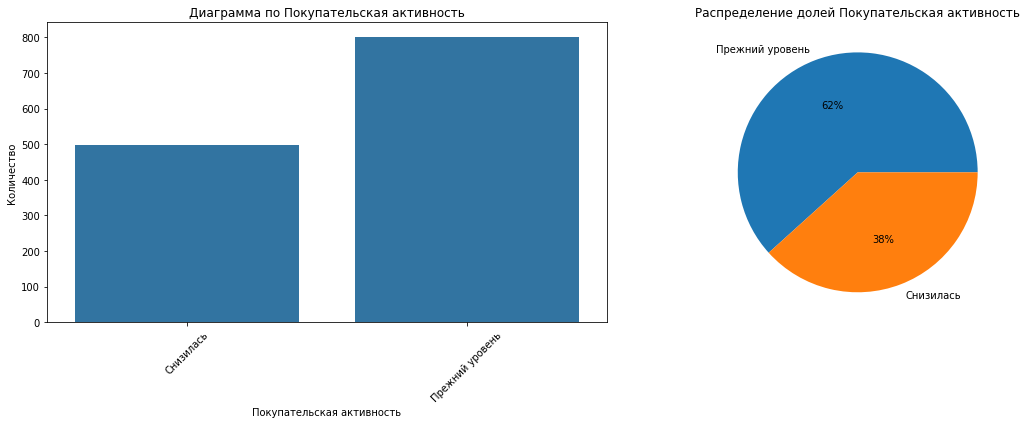

In [34]:
# Построим графики для столбца `покупательская_активность'
cat_plot(market_file, 'покупательская_активность', 'Покупательская активность')            

Видим, что большая часть покупателей (62%) осталась на прежнем уровне покупательской активности.


*Тип сервиса*

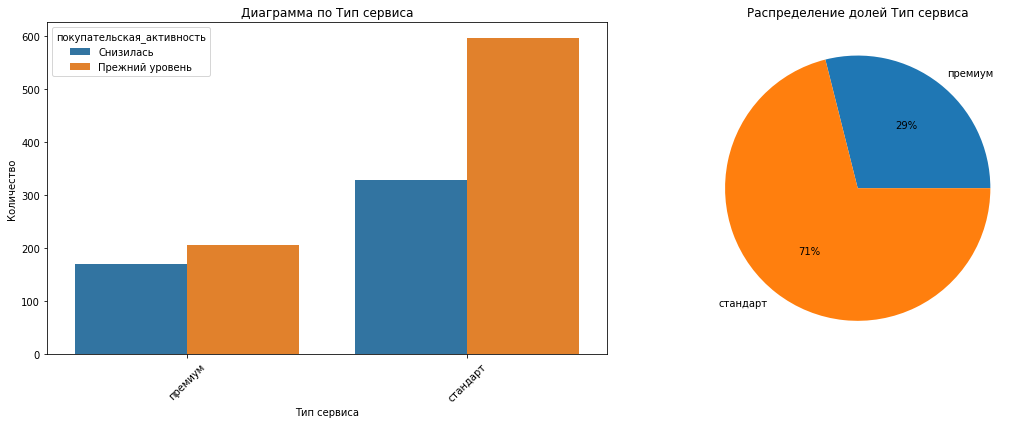

In [35]:
# Построим графики для столбца `тип_сервиса'
cat_plot(market_file, 'тип_сервиса', 'Тип сервиса', 'покупательская_активность') 


Премиум сервисом пользуется только 29% пользователей против 71% пользователей с сервисом Стандарт. Покупательская активность снизилась в большей мере у пользователей премиум сервиса.

*Можно ли присылать покупателю дополнительные предложения о товаре*

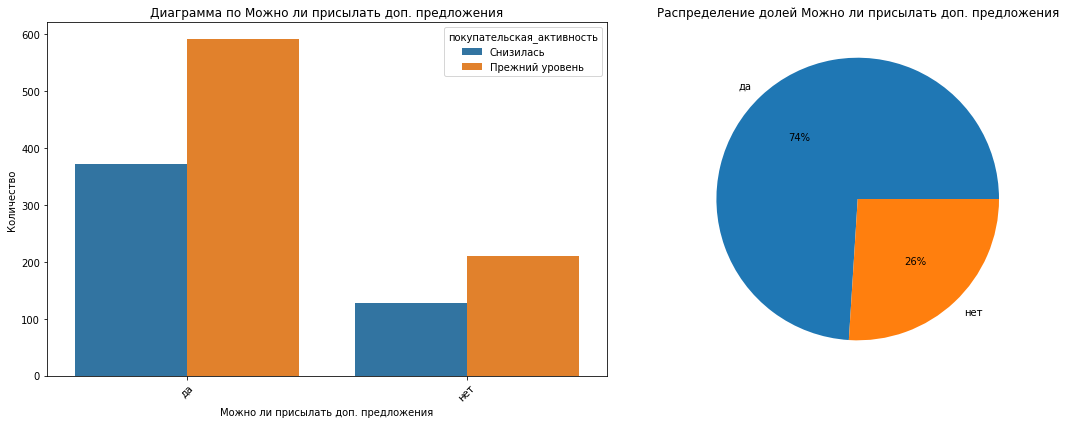

In [36]:
# Построим графики для столбца `разрешить_сообщать'
cat_plot(market_file, 'разрешить_сообщать', 'Можно ли присылать доп. предложения', 'покупательская_активность') 


74% покупателей согласны, чтобы им присылали новые предложения о товаре. Покупательская активность снизилась у обеих категорий.

*Самая популярная категория товаров у покупателя за последние 6 месяцев*

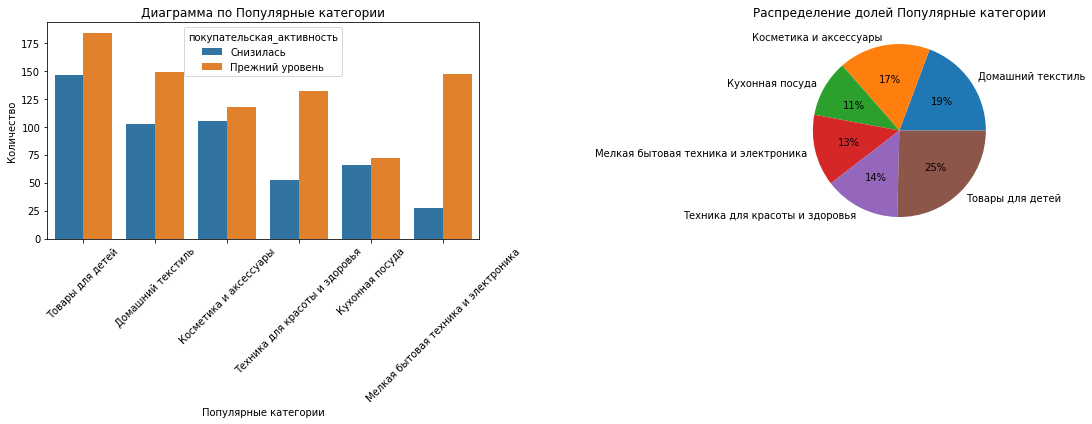

In [37]:
# Построим графики для столбца `популярная_категория'
cat_plot(market_file, 'популярная_категория', 'Популярные категории', 'покупательская_активность') 

Самой популярной категорией покупаемых товаров являются товары для детей - 25%, затем следуют домашний текстиль - 19% и косметика и аксссуары - 17%. Меньше всего покупают кухонную посуду - 11%.  
Больше всего покупательская активность снизилась у покупателей товаров для детей.

Посмотрим теперь количественные признаки.  

In [38]:
# Сводная статистика для количественных полей датафрейма'market_file'
market_file.describe().round(2)

id  маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
count    1300.00             1300.00               1300.00       1300.00   
mean   215997.50                4.25                  4.01        601.90   
std       375.42                1.01                  0.70        249.86   
min    215348.00                0.90                  3.00        110.00   
25%    215672.75                3.70                  4.00        405.50   
50%    215997.50                4.20                  4.00        606.00   
75%    216322.25                4.90                  4.00        806.00   
max    216647.00                6.60                  5.00       1079.00   

       акционные_покупки  средний_просмотр_категорий_за_визит  \
count            1300.00                              1300.00   
mean                0.32                                 3.27   
std                 0.25                                 1.36   
min                 0.00                                 1.00   
25%                 0.17                                 2.00   
50%                 0.24                                 3.00   
75%                 0.30                                 4.00   
max                 0.99                                 6.00   

       неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
count                             1300.00         1300.00           1300.00  
mean                                 2.84            4.19              8.18  
std                                  1.97            1.96              3.98  
min                                  0.00            0.00              1.00  
25%                                  1.00            3.00              5.00  
50%                                  3.00            4.00              8.00  
75%                                  4.00            6.00             11.00  
max                                 10.00            9.00             20.00

*Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев* 

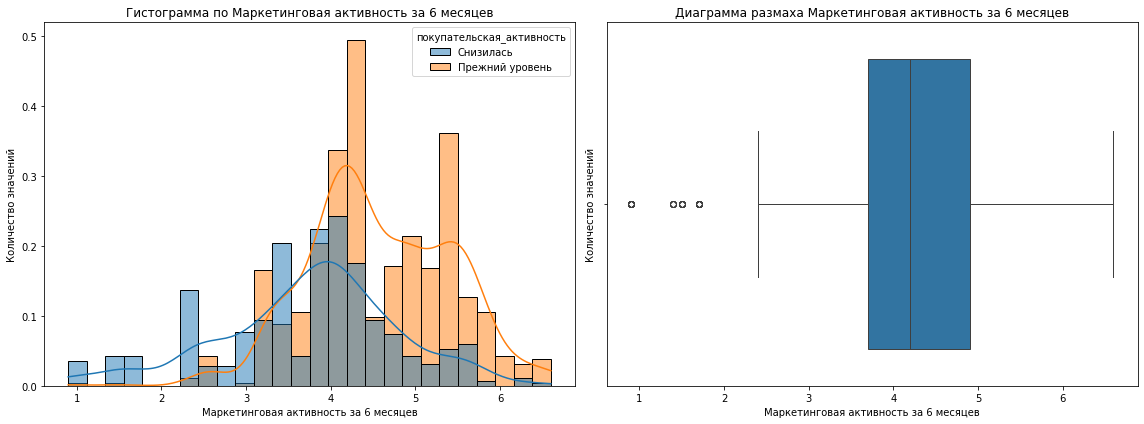

In [39]:
# Построим графики для столбца `маркет_актив_6_мес`
num_plot(market_file, 'маркет_актив_6_мес', 'Маркетинговая активность за 6 месяцев', 'Количество значений', 'покупательская_активность')

За последние 6 месяцев на одного покупателя приходилось в среднем около 4 маркетинговых коммуникаций.  
Покупательская активность снижается у покупателей, для которых значения маркетинговых коммуникаций за последние 6 месяцев были низкие.

*Количество маркетинговых коммуникаций в текущем месяце*

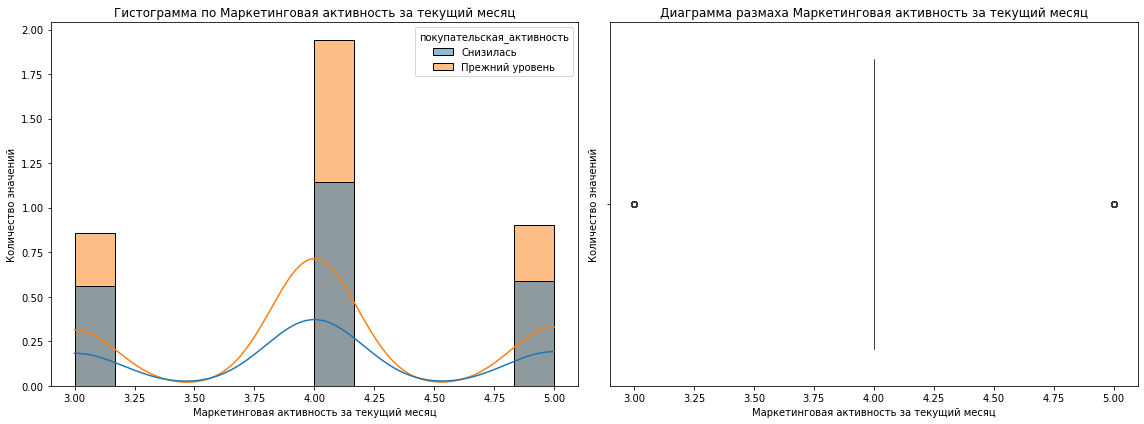

In [40]:
# Построим графики для столбца `маркет_актив_тек_мес`
num_plot(market_file, 'маркет_актив_тек_мес', 'Маркетинговая активность за текущий месяц', 'Количество значений', 'покупательская_активность')

В текущем месяце на одного покупателя приходилось в среднем также 4 маркетинговых коммуникации.

*Сколько дней прошло с момента регистрации покупателя на сайте*

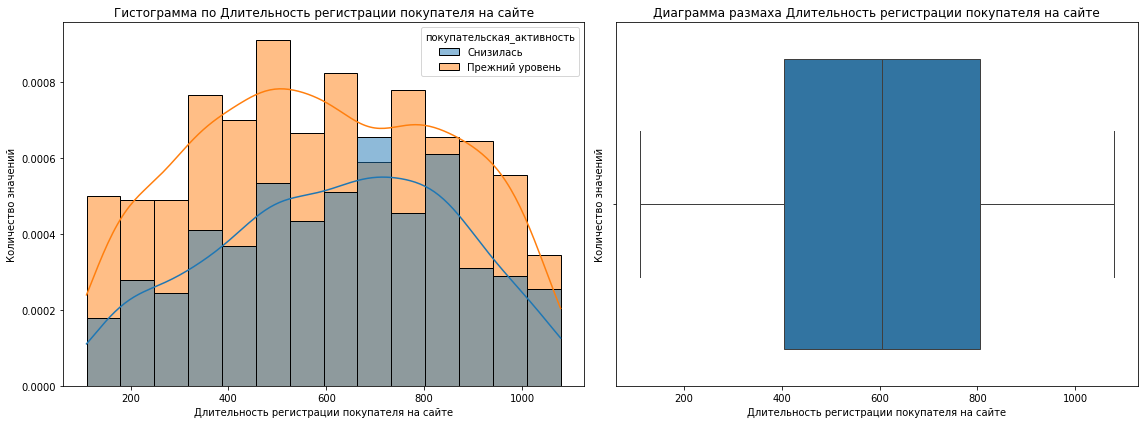

In [41]:
# Построим графики для столбца `длительность`
num_plot(market_file, 'длительность', 'Длительность регистрации покупателя на сайте', 'Количество значений', 'покупательская_активность')

Больше всего покупателей регистрировалось 400 - 900 дней назад. Последние 400 дней количество новых зарегистрированных пользователей стало меньше. Самый долгий срок с момена регистрации составляет 1079 дней, самый короткий - 110 дней. Среднее значение равняется 601 дню, медиана - 606 дней. Распределение близко к нормальному.

*Акционные покупки*

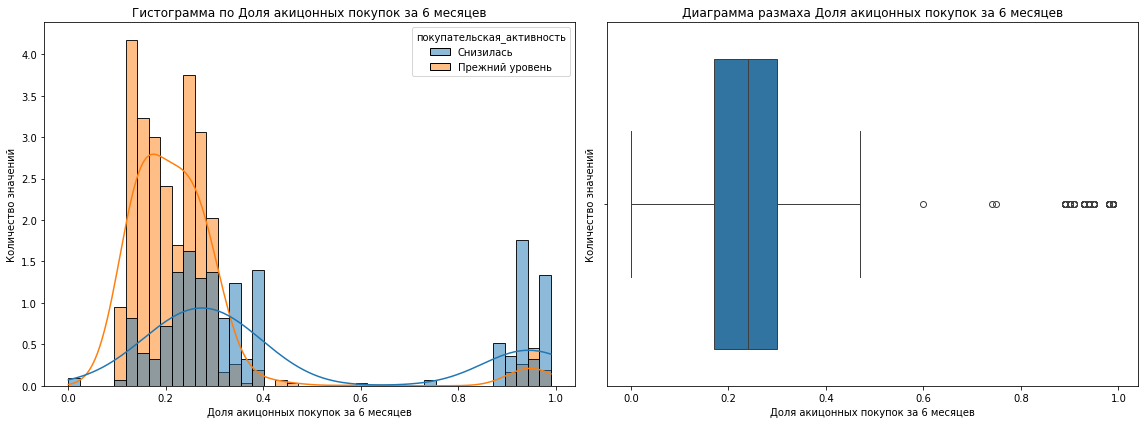

In [42]:
# Построим графики для столбца `акционные_покупки`
num_plot(market_file, 'акционные_покупки', 'Доля акицонных покупок за 6 месяцев', 'Количество значений', 'покупательская_активность')

Из графика видно, что всех покупателей можно разделить на 2 группы: тех, кто изредка покупают акционные товары, и тех, кто отслеживает скидки и почти всегда покупают акционные товары. Первая группа составляет большинство.  
Видно, что покупательская активность снижается если доля акционных покупок больше 0.3.

*Средний просмотр категорий за визит*

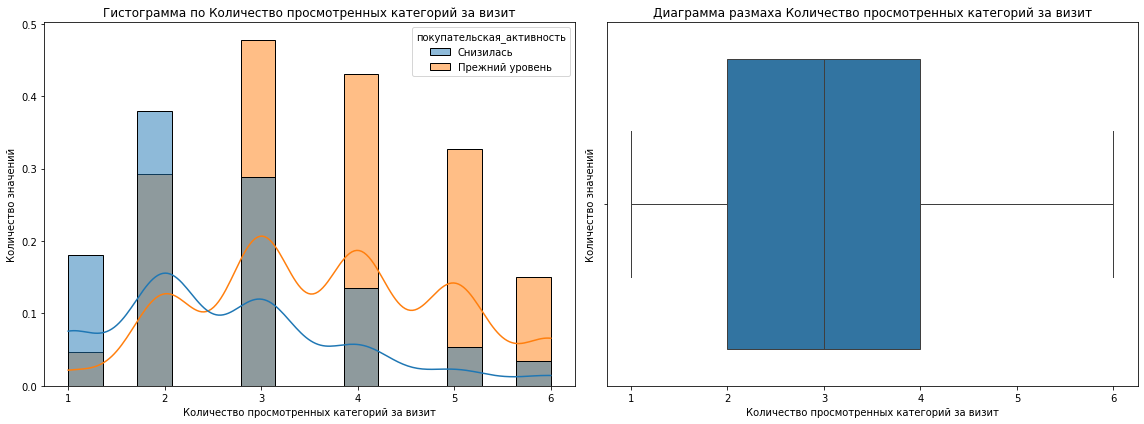

In [43]:
# Построим графики для столбца `средний_просмотр_категорий_за_визит`
num_plot(market_file, 'средний_просмотр_категорий_за_визит', 'Количество просмотренных категорий за визит', 'Количество значений', 'покупательская_активность')

Обычно за визит просматривается 2 - 4 категории товаров. Среднее значение составляет 3,27, медиана - 3. Максимальное количество просматривамых категорий равняется 6, минимальное - 1.  
У тех кто смотрит мало категорий, покупательская активность снижена.

*Общее число неоплаченных товаров в корзине за последние 3 месяца*

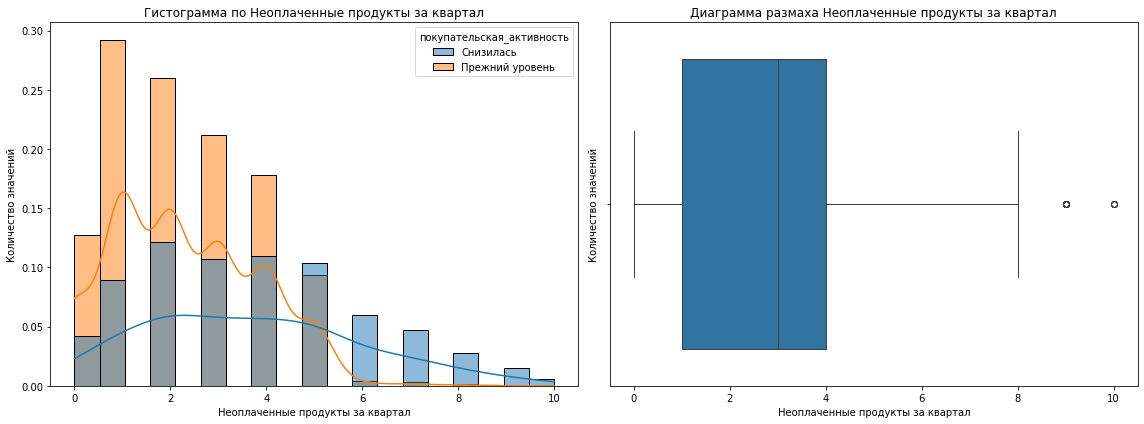

In [44]:
# Построим графики для столбца `неоплаченные_продукты_штук_квартал`
num_plot(market_file, 'неоплаченные_продукты_штук_квартал', 'Неоплаченные продукты за квартал', 'Количество значений', 'покупательская_активность')

Общее количество неоплаченных товаров в корзине за последние 3 месяца в основном бывает от 1 до 5. Максимальное число - 10.  
Покупательская активность снижается у покупателей, которые оставляют неоплаченными более 6 товаров.

*Ошибка_сервиса*

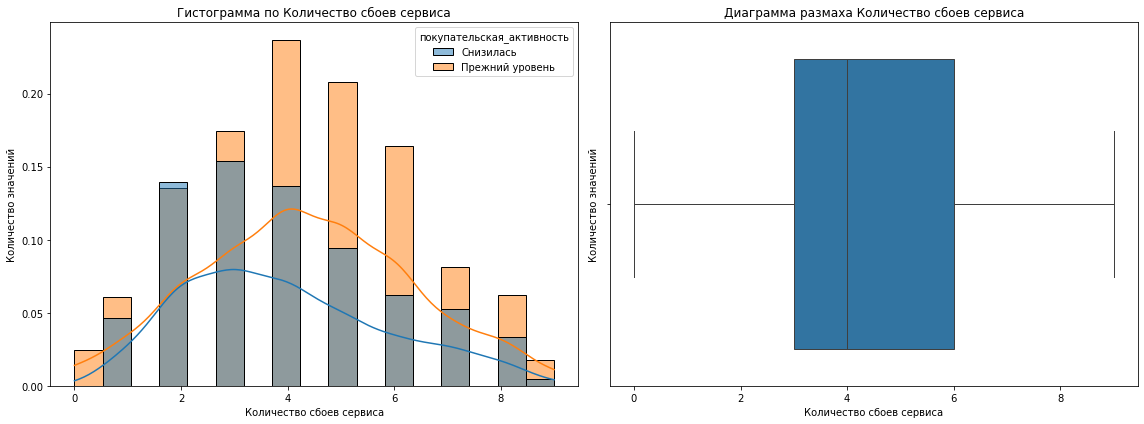

In [45]:
# Построим графики для столбца `ошибка_сервиса`
num_plot(market_file, 'ошибка_сервиса', 'Количество сбоев сервиса', 'Количество значений', 'покупательская_активность')

Покупатели сталкиваются с 3 - 5 сбоями во время посещения сайта. Максимально значение - 9 сбоев.

*Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца*

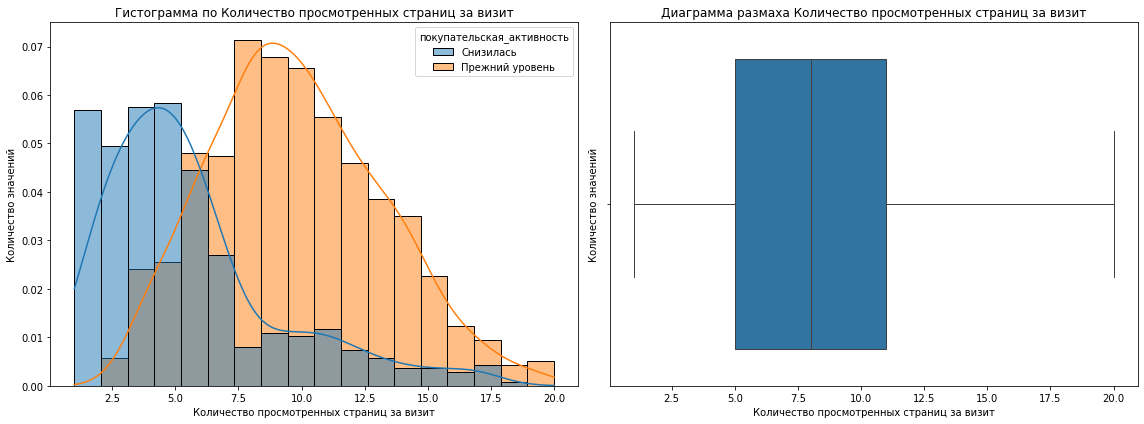

In [46]:
# Построим графики для столбца `страниц_за_визит`
num_plot(market_file, 'страниц_за_визит', 'Количество просмотренных страниц за визит', 'Количество значений', 'покупательская_активность')

Чаще всего за 1 визит покупатели просматривают по 5-10 страниц. Максимум - 20 страниц.  
У тех покупателей, которые посещают мало страниц за визит, покупательская активность ниже.

<u>Датафрейм `market_money`<u> 

In [47]:
# Выведем первые строки
market_money.head(7)

id               период  выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0

In [48]:
market_money.shape

(3900, 3)

*Период*

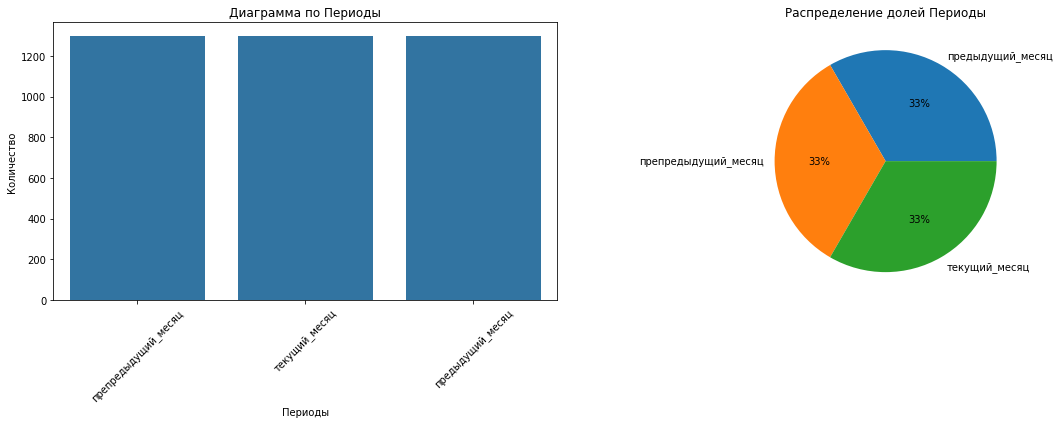

In [49]:
# Построим графики для столбца `период`
cat_plot(market_money, 'период', 'Периоды') 

Как видим, в датафрейме `market_money` выделено три периода, которые распределены равномерно и имеют по 1300 наблюдений каждый.

*Выручка*

In [50]:
# Сводная статистика 
market_money.describe().round(2)

id    выручка
count    3900.00    3900.00
mean   215997.50    5025.70
std       375.33    1777.70
min    215348.00       0.00
25%    215672.75    4590.15
50%    215997.50    4957.50
75%    216322.25    5363.00
max    216647.00  106862.20

Привлекает внимание максимальное значение выручки 106862,20 руб., при том, что среднее значение составляет 5025,70 руб., медианное - 4957,50 руб. Надо детальнее проверить это значение.  
Сначала создадим отдельные столбцы для каждого периода.

In [51]:
market_money_p = market_money.pivot_table(index='id', columns='период', values='выручка').reset_index()

# Изменим наименования столбцов
market_money_p.columns = ['id', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_p.head()

id  выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
0  215348                       0.0                          0.0   
1  215349                    5216.0                       4472.0   
2  215350                    5457.5                       4826.0   
3  215351                    6158.0                       4793.0   
4  215352                    5807.5                       4594.0   

   выручка_текущий_месяц  
0                 3293.1  
1                 4971.6  
2                 5058.4  
3                 6610.4  
4                 5872.5

In [52]:
# Разместим столбцы в хронологическом порядке
column_order = ['id', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']
market_money_p = market_money_p.reindex(columns=column_order)
market_money_p.head()

id  выручка_препредыдущий_месяц  выручка_предыдущий_месяц  \
0  215348                          0.0                       0.0   
1  215349                       4472.0                    5216.0   
2  215350                       4826.0                    5457.5   
3  215351                       4793.0                    6158.0   
4  215352                       4594.0                    5807.5   

   выручка_текущий_месяц  
0                 3293.1  
1                 4971.6  
2                 5058.4  
3                 6610.4  
4                 5872.5

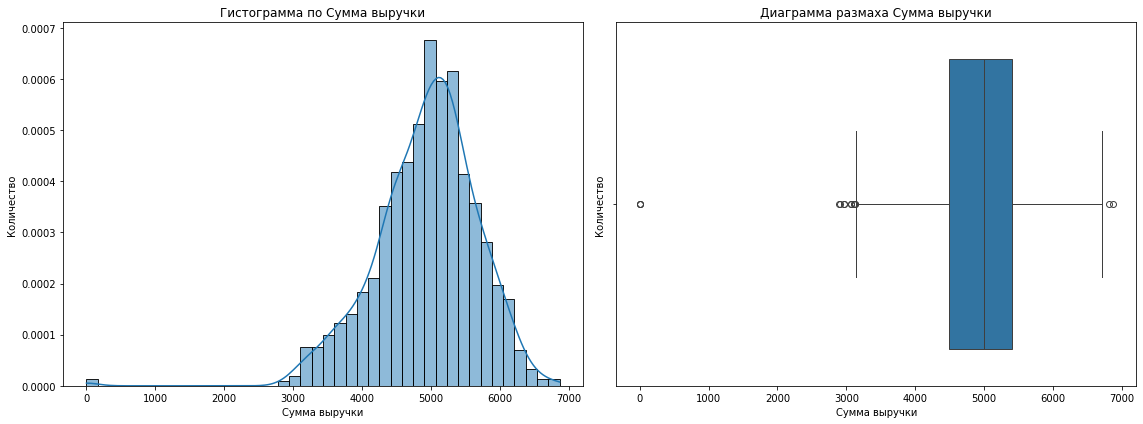

In [53]:
# Построим графики для столбца `выручка_предыдущий_месяц`
num_plot(market_money_p, 'выручка_предыдущий_месяц', 'Сумма выручки', 'Количество') 

Есть выброс - нулевое значение выручки.

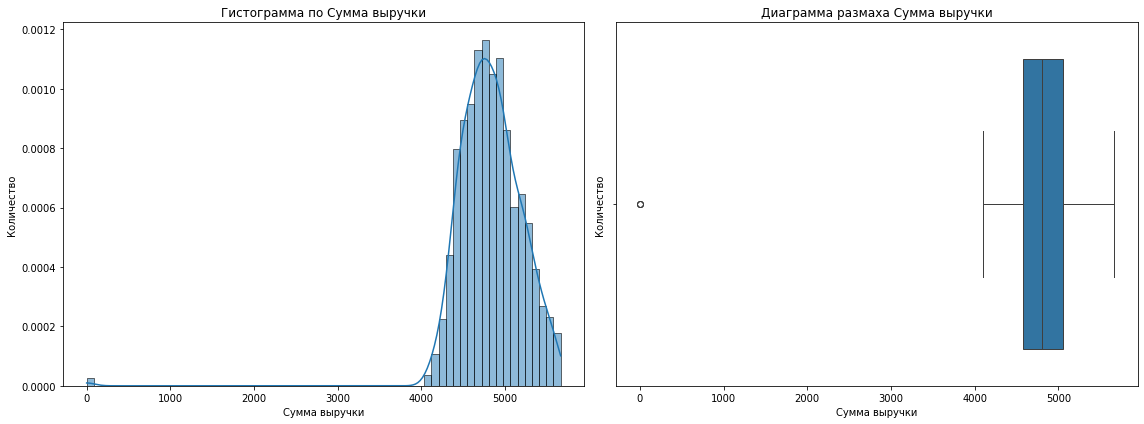

In [54]:
# Построим графики для столбца `выручка_препредыдущий_месяц`
num_plot(market_money_p, 'выручка_препредыдущий_месяц', 'Сумма выручки', 'Количество') 

Здесь также есть выброс - нулевое значение.

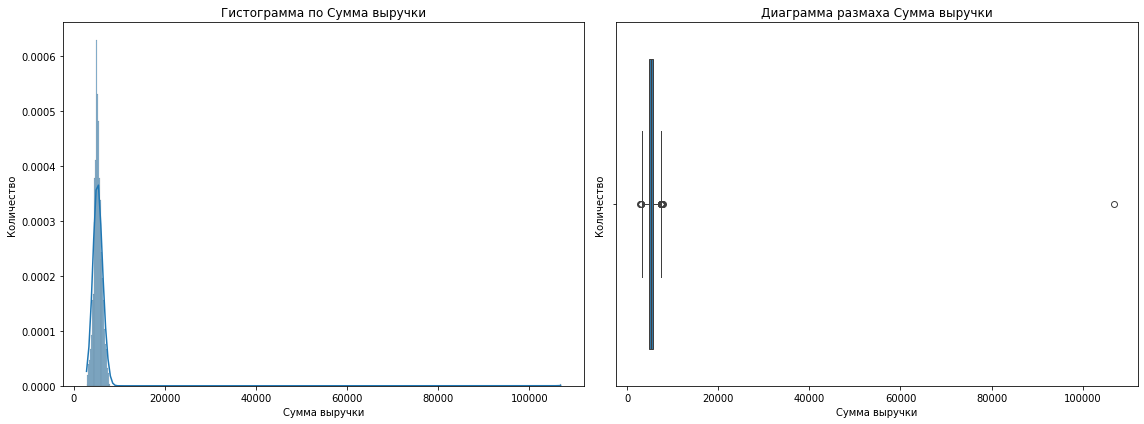

In [55]:
# Построим графики для столбца `выручка_текущий_месяц`
num_plot(market_money_p, 'выручка_текущий_месяц', 'Сумма выручки', 'Количество') 

Видим явный выброс - то самое максимальное значение выручки 106862,20 руб.  
Посмотрим это значение.

In [56]:
market_money_p.query('выручка_текущий_месяц > 100000')

id  выручка_препредыдущий_месяц  выручка_предыдущий_месяц  \
32  215380                       5051.0                    6077.0   

    выручка_текущий_месяц  
32               106862.2

Посмотрим активность этого покупателя

In [57]:
for i in [market_file, market_money, market_time, money]:
    display(i.query('id == 215380'))


id покупательская_активность тип_сервиса разрешить_сообщать  \
32  215380                 Снизилась     премиум                нет   

    маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
32                 1.7                     4           637               0.94   

              популярная_категория  средний_просмотр_категорий_за_визит  \
32  Техника для красоты и здоровья                                    3   

    неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
32                                   2               4                 7

id               период   выручка
96  215380  препредыдущий_месяц    5051.0
97  215380     предыдущий_месяц    6077.0
98  215380        текущий_месяц  106862.2

id            период  минут
64  215380  предыдущий_месяц     12
65  215380     текущий_месяц     14

id  прибыль
32  215380   3880.0

Как можно увидеть, покупатель был активен, хоть его активность и была отнесена к классу 'Снизилась'. Произведем замену аномального значения на среднее значение его активности за два предыдущих периода.

In [58]:
market_money_p.loc[32, 'выручка_текущий_месяц'] = market_money_p.loc[32, ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц']].mean()

In [59]:
# Проверим
market_money_p.query('id==215380')

id  выручка_препредыдущий_месяц  выручка_предыдущий_месяц  \
32  215380                       5051.0                    6077.0   

    выручка_текущий_месяц  
32                 5564.0

Построим графики еще раз 

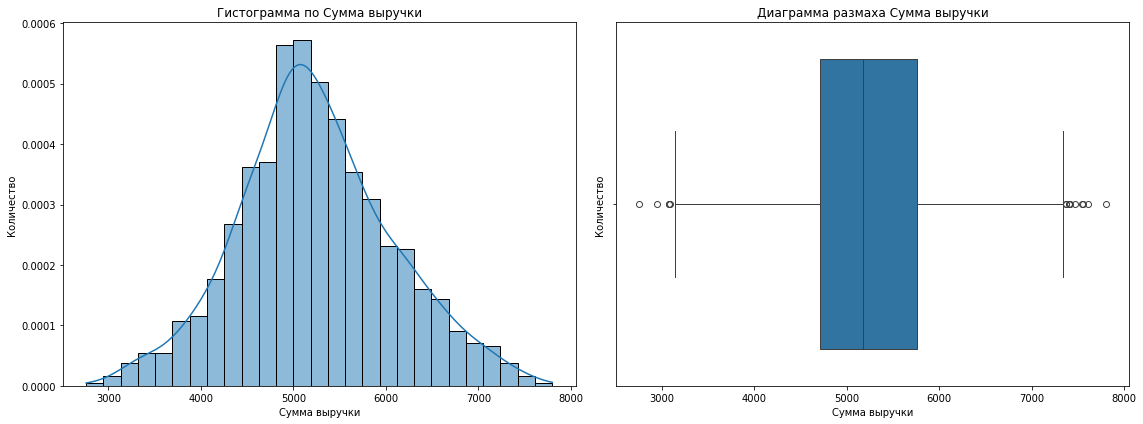

In [60]:
# Построим графики для столбца `выручка_текущий_месяц`
num_plot(market_money_p, 'выручка_текущий_месяц', 'Сумма выручки', 'Количество')

<u>Датафрейм `market_time`<u> 

In [61]:
# Выведем первые строки
market_time.head(7)

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдущий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдущий_месяц     12
4  215350     текущий_месяц     13
5  215350  предыдущий_месяц      8
6  215351     текущий_месяц     13

Cоздадим отдельные столбцы для каждого периода.

In [62]:
market_time_p = market_time.pivot_table(index='id', columns='период', values='минут').reset_index()

# Изменим наименования столбцов
market_time_p.columns = ['id', 'время_предыдущий_месяц', 'время_текущий_месяц']
market_time_p.head()

id  время_предыдущий_месяц  время_текущий_месяц
0  215348                      13                   14
1  215349                      12                   10
2  215350                       8                   13
3  215351                      11                   13
4  215352                       8                   11

In [63]:
# Сводная статистика 
market_time_p.describe().round(2)

id  время_предыдущий_месяц  время_текущий_месяц
count    1300.00                 1300.00              1300.00
mean   215997.50                   13.47                13.20
std       375.42                    3.93                 4.22
min    215348.00                    5.00                 4.00
25%    215672.75                   11.00                10.00
50%    215997.50                   13.00                13.00
75%    216322.25                   17.00                16.00
max    216647.00                   23.00                23.00

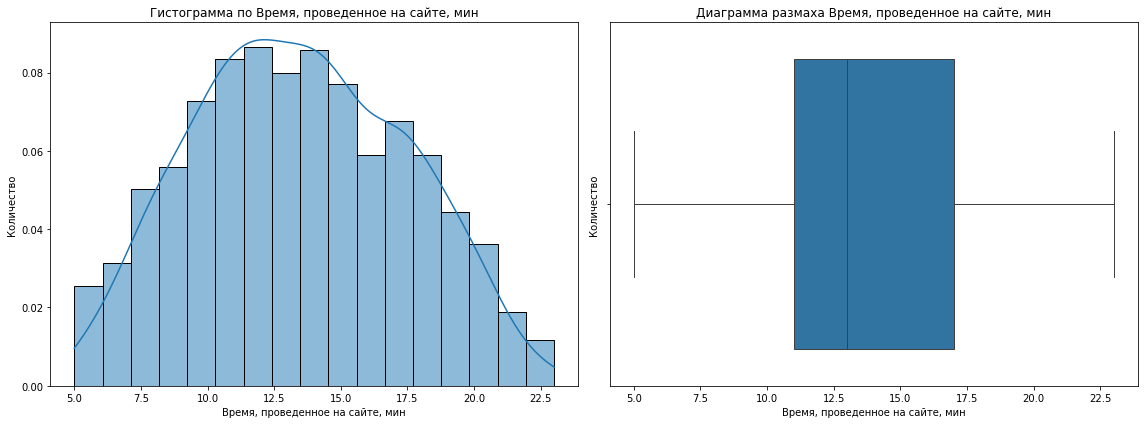

In [64]:
# Построим графики для столбца `время_предыдущий_месяц`
num_plot(market_time_p, 'время_предыдущий_месяц', 'Время, проведенное на сайте, мин', 'Количество')

В предыдущем месяце покупатели проводили на сайте 11-17 минут в основной массе. Среднее значение составило 13,47 мин. Самое продолжительное посещение сайта было 23 мин, самое короткое - 5 мин. 

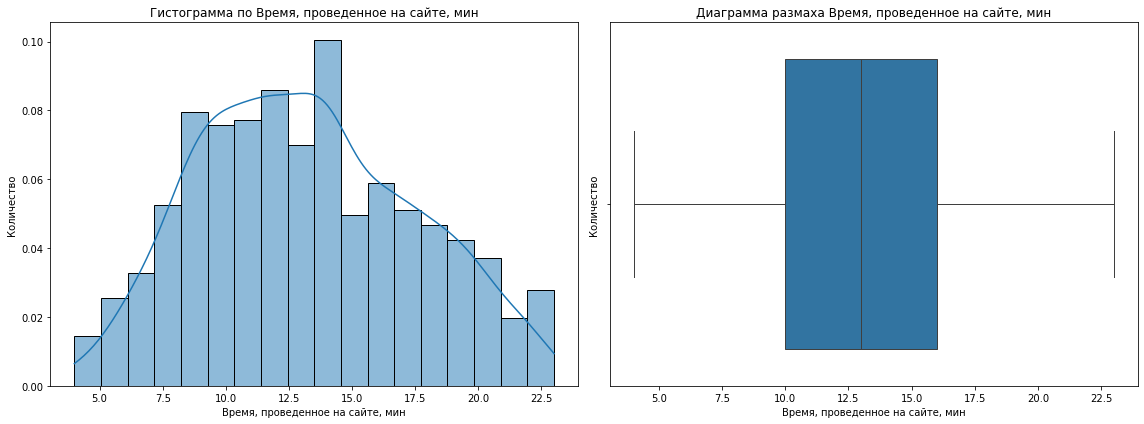

In [65]:
# Построим графики для столбца `время_текущий_месяц`
num_plot(market_time_p, 'время_текущий_месяц', 'Время, проведенное на сайте, мин', 'Количество')

В текущем месяце покупатели проводят на сайте 9 - 16 минут. Среднее значение стало меньше в текущем месяце по сравнению с предыдущим - 13,2 мин. Максимальное время осталось прежним - 23 мин, минимальное сократилось до 4 мин.

<u>Датафрейм `money`<u> 

In [66]:
# Выведем первые строки
money.head(7)

id  прибыль
0  215348    980.0
1  215349   4160.0
2  215350   3130.0
3  215351   4870.0
4  215352   4210.0
5  215353   3950.0
6  215354   3620.0

In [67]:
# Сводная статистика 
money.describe().round(2)

id  прибыль
count    1300.00  1300.00
mean   215997.50  3996.63
std       375.42  1013.72
min    215348.00   860.00
25%    215672.75  3300.00
50%    215997.50  4045.00
75%    216322.25  4670.00
max    216647.00  7430.00

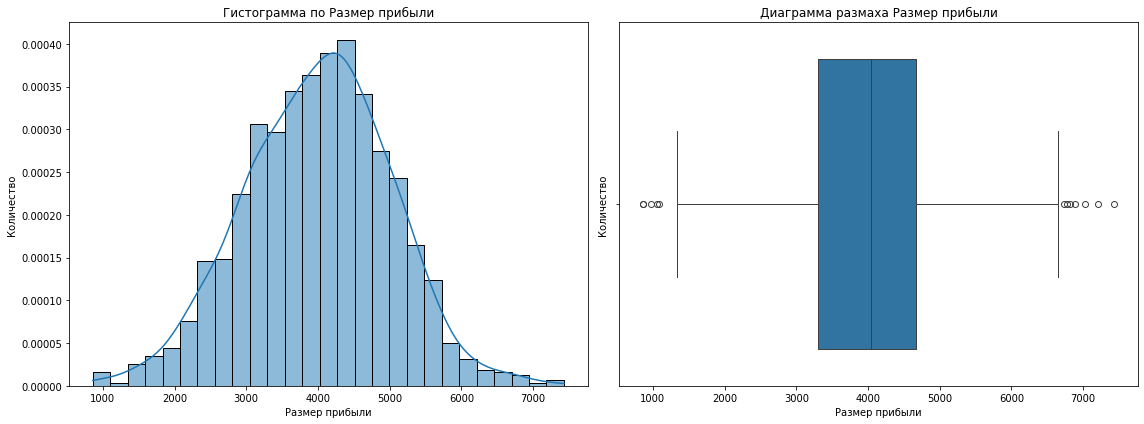

In [68]:
# Построим графики для столбца `прибыль`
num_plot(money, 'прибыль', 'Размер прибыли', 'Количество')

Большая часть прибыли находится в диапазоне от 3500 до 4500 руб. Среднее значение составило 3996,63 руб. Максимальное - 7430 руб, минимальное - 860 руб.
Распредление близко к нормальному. 

### Отбор клиентов с покупательской активностью не менее трёх месяцев

Отберем в датасете 'market_money' пользователей, которые делали покупки за последние три месяца.  
Посмотрим покупателей, у которых хотя бы в одном месяце выручка равна 0.


In [69]:
market_money.query('выручка == 0')

id               период  выручка
0   215348  препредыдущий_месяц      0.0
2   215348     предыдущий_месяц      0.0
28  215357  препредыдущий_месяц      0.0
29  215357     предыдущий_месяц      0.0
34  215359     предыдущий_месяц      0.0
35  215359  препредыдущий_месяц      0.0

Выявилось 3 покупателя с нулевой выручкой. Удалим их по `id` из `market_file`, `money`, а также из `market_money_p` и `market_time_p`, подготовленных ранее с отдельными столбцами для каждого периода.

In [70]:
market_file = market_file.query('id != 215348 and id != 215357 and id != 215359')


In [71]:
market_money_p = market_money_p.query('id != 215348 and id != 215357 and id != 215359')
market_time_p = market_time_p.query('id != 215348 and id != 215357 and id != 215359')
money = money.query('id != 215348 and id != 215357 and id != 215359')

In [72]:
# Посмотрим на размеры получившихся датафреймов
print(market_file.shape)
print(market_money_p.shape)
print(market_time_p.shape)
print(money.shape)

(1297, 13)
(1297, 4)
(1297, 3)
(1297, 2)


**Выводы:**  

На данном этапе был проведен исследовательский анализ данных. В ходе работы были изучены целевой признак 'Покупательская активность' и имеющиеся входные качественные и количественные признаки. Было выявлено и обработано аномальное значение выручки. Также отобрали клиентов, совершавших покупки в течении трех последних месяцев.  
Результаты анализа данных следующие:  
- Большая часть покупателей (62%) осталась на прежнем уровне покупательской активности.  
- Премиум сервисом пользуется только 29% пользователей против 71% пользователей с сервисом Стандарт. Покупательская активность снизилась в большей мере у пользователей Премиум сервиса.  
- 74% покупателей согласны, чтобы им присылали новые предложения о товаре. Покупательская активность снизилась у обеих категорий: и  тех покупателей, которые согласны на получени дополнительных предложений, и у тех, что не согласны.
- Самой популярной категорией покупаемых товаров являются товары для детей - 25%, затем следуют домашний текстиль - 19% и косметика и аксссуары - 17%. Меньше всего покупают кухонную посуду - 11%.
Больше всего покупательская активность снизилась у покупателей товаров для детей.
- За последние 6 месяцев на одного покупателя приходилось в среднем около 4 маркетинговых коммуникаций.
Покупательская активность снижается у покупателей, для которых значения маркетинговых коммуникаций за последние 6 месяцев были низкие.  
- В текущем месяце на одного покупателя приходилось в среднем также 4 маркетинговых коммуникации.  
- Больше всего покупателей регистрировалось 400 - 900 дней назад. Последние 400 дней количество новых зарегистрированных пользователей стало меньше. Самый долгий срок с момена регистрации составляет 1079 дней, самый короткий - 110 дней. Среднее значение равняется 601 дню, медиана - 606 дней. Распределение близко к нормальному.  
- Всех покупателей можно разделить на 2 группы: тех, кто изредка покупают акционные товары, и тех, кто отслеживает скидки и почти всегда покупают акционные товары. Первая группа составляет большинство.
Видно, что покупательская активность снижается если доля акционных покупок больше 0.3.  
- Обычно за визит просматривается 2 - 4 категории товаров. Среднее значение составляет 3,27, медиана - 3. Максимальное количество просматривамых категорий равняется 6, минимальное - 1.
У тех кто смотрит мало категорий, покупательская активность снижена.  
- Общее количество неоплаченных товаров в корзине за последние 3 месяца в основном бывает от 1 до 5. Максимальное число - 10.
Покупательская активность снижается у покупателей, которые оставляют неоплаченными более 6 товаров.  
- Покупатели сталкиваются с 3 - 5 сбоями во время посещения сайта. Максимально значение - 9 сбоев.  
- Чаще всего за 1 визит покупатели просматривают по 5-10 страниц. Максимум - 20 страниц.
У тех покупателей, которые посещают мало страниц за визит, покупательская активность ниже.  
- в датафрейме market_money выделено три периода, которые распределены равномерно и имеют по 1300 наблюдений каждый.  
- В предыдущем месяце покупатели проводили на сайте 11-17 минут в основной массе. Среднее значение составило 13,47 мин. Самое продолжительное посещение сайта было 23 мин, самое короткое - 5 мин.  
- Большая часть прибыли находится в диапазоне от 3500 до 4500 руб. Среднее значение составило 3996,63 руб. Максимальное - 7430 руб, минимальное - 860 руб. Распредление близко к нормальному.
  
  

## Объединение таблиц

Ранее мы подготовили таблицы `market_money_p` и `market_time_p`.  

Объединим датасеты `market_file`, `market_money_p` и `market_time_p`

In [73]:
market_df = market_file.merge(market_money_p, on='id').merge(market_time_p, on='id')

In [74]:
# Посмотрим на объединную таблицу
market_df.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка_препредыдущий_месяц  выручка_предыдущий_месяц  \
0                       4472.0                    5216.0   
1                       4826.0                    5457.5   
2                       4793.0                    6158.0   
3                       4594.0                    5807.5   
4                       5124.0                    4738.5   

   выручка_текущий_месяц  время_предыдущий_месяц  время_текущий_месяц  
0                 4971.6                      12                   10  
1                 5058.4                       8                   13  
2                 6610.4                      11                   13  
3                 5872.5                       8                   11  
4                 5388.5                      10                   10

In [75]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

In [76]:
# Проверим наличие пропусков в market_df
market_df.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_препредыдущий_месяц            0
выручка_предыдущий_месяц               0
выручка_текущий_месяц                  0
время_предыдущий_месяц                 0
время_текущий_месяц                    0
dtype: int64

In [77]:
# Проверим наличие дубликатов в market_df
market_df.duplicated().sum()

0

Пропусков и дубликатов нет.

## Корреляционный анализ

### Матрица корреляции

Построим матрицу корреляции между признаками в датасете market_df.  


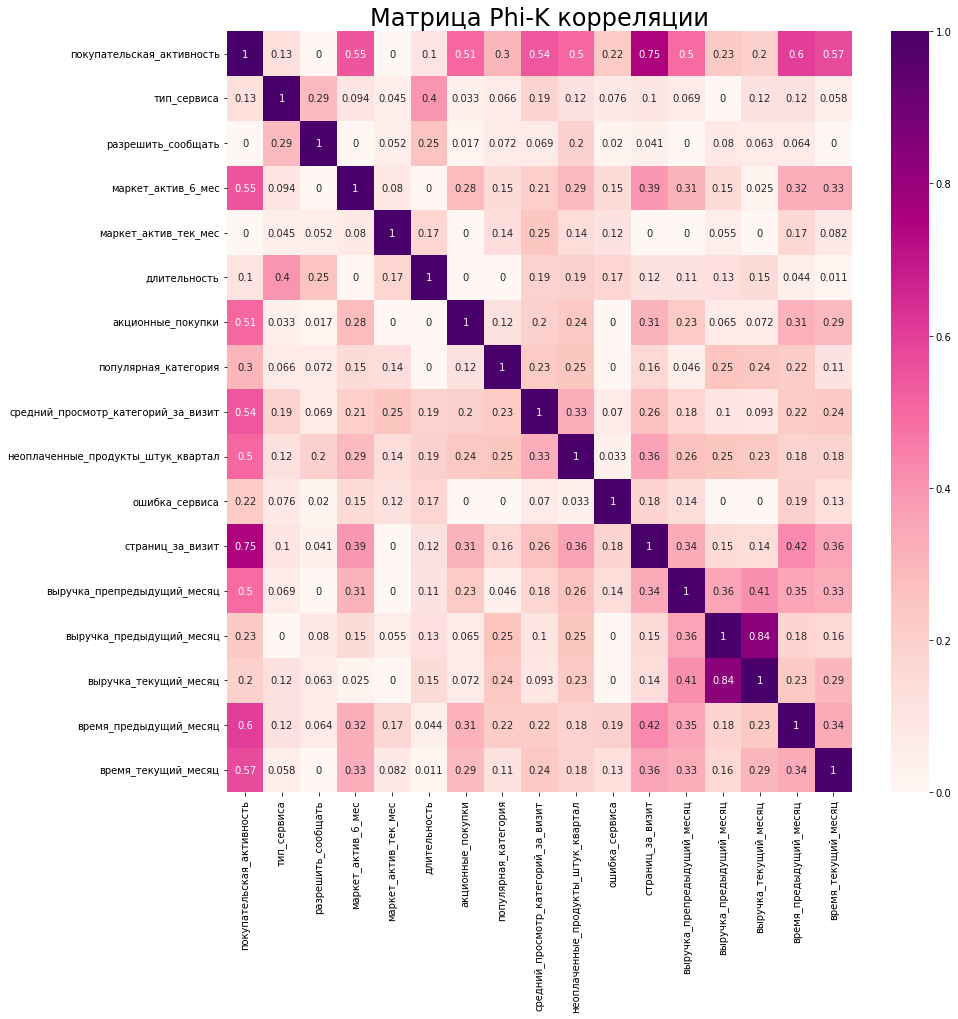

In [78]:
# Построиm матрицу корреляции (без колонки 'id') средствами библиотеки `phik`

plt.figure(figsize=(14,14))
sns.heatmap(market_df.drop(columns=['id'], axis=1).phik_matrix(interval_cols=['маркет_актив_6_мес',
                                                                        'маркет_актив_тек_мес',
                                                                        'длительность',
                                                                        'акционные_покупки', 
                                                                        'средний_просмотр_категорий_за_визит',
                                                                        'неоплаченные_продукты_штук_квартал',
                                                                        'ошибка_сервиса',
                                                                        'страниц_за_визит',
                                                                        'выручка_предыдущий_месяц',
                                                                        'выручка_препредыдущий_месяц',
                                                                        'выручка_текущий_месяц',
                                                                        'минут_предыдущий_месяц',
                                                                        'минут_текущий_месяц']) \
            , annot=True, cmap='RdPu')
plt.title('Матрица Phi-K корреляции', fontsize=24)
plt.show()



- Относительно целевого признака Покупательская активность можно сказать следующее:  
наблюдается достаточно существеная корреляция со средним количеством страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца - коэффициент 0,75, умеренная - со временем на сайте за предыдущий месяц (0,6), временем на сайте за текущий месяц (0,57).
С такими признаками как` маркет_актив_6_мес`, `средний_просмотр_категорий_за_визит`, `акционные_покупки`, `неоплаченные_продукты_штук_квартал`, `выручка_препредыдущий_месяц` прослеживается корреляция умеренная, стремящаяся к слабой.
С остальными признаками корреляция совсем слабая либо отсутствует. В частности, корреляция целевого признака с выручкой в разных периодов находится в диапазоне от очень слабой до слабой.

- Прослеживается достаточно сильная взаимосвязь между выручкой за предыдущий месяц и выручкой за текущий месяц - коэффициент фи равен 0,84.
 

### Проверка мультиколлинеарности и расчет коэффициента VIF

In [79]:
interval_cols = [
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 
    'акционные_покупки', 'средний_просмотр_категорий_за_визит', 
    'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 
    'страниц_за_визит', 'выручка_предыдущий_месяц', 
    'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
    'время_предыдущий_месяц', 'время_текущий_месяц'
]


# Добавляем константу
X = sm.add_constant(market_df[interval_cols])

# Вычисляем VIF для каждого признака
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                               Variable         VIF
0                                 const  352.746445
1                    маркет_актив_6_мес    1.221564
2                  маркет_актив_тек_мес    1.044478
3                          длительность    1.099467
4                     акционные_покупки    1.186183
5   средний_просмотр_категорий_за_визит    1.178631
6    неоплаченные_продукты_штук_квартал    1.198202
7                        ошибка_сервиса    1.079288
8                      страниц_за_визит    1.417590
9              выручка_предыдущий_месяц    4.257304
10          выручка_препредыдущий_месяц    1.612591
11                выручка_текущий_месяц    3.889624
12               время_предыдущий_месяц    1.526976
13                  время_текущий_месяц    1.320945


Ключевые пороги для VIF:

VIF < 5: Минимальная мультиколлинеарность, это нормально.  
5 ≤ VIF ≤ 10: Признак умеренной мультиколлинеарности, стоит обратить внимание.  
VIF > 10: Сильная мультиколлинеарность, вероятно, данные коррелируют с другими, стоит рассмотреть их исключение или трансформацию.  
Все признаки < 5 - мультиколлинеарности нет.

### Матрица диаграмм рассеяния для целевого признака Покупательская активность

<Figure size 2160x2160 with 0 Axes>

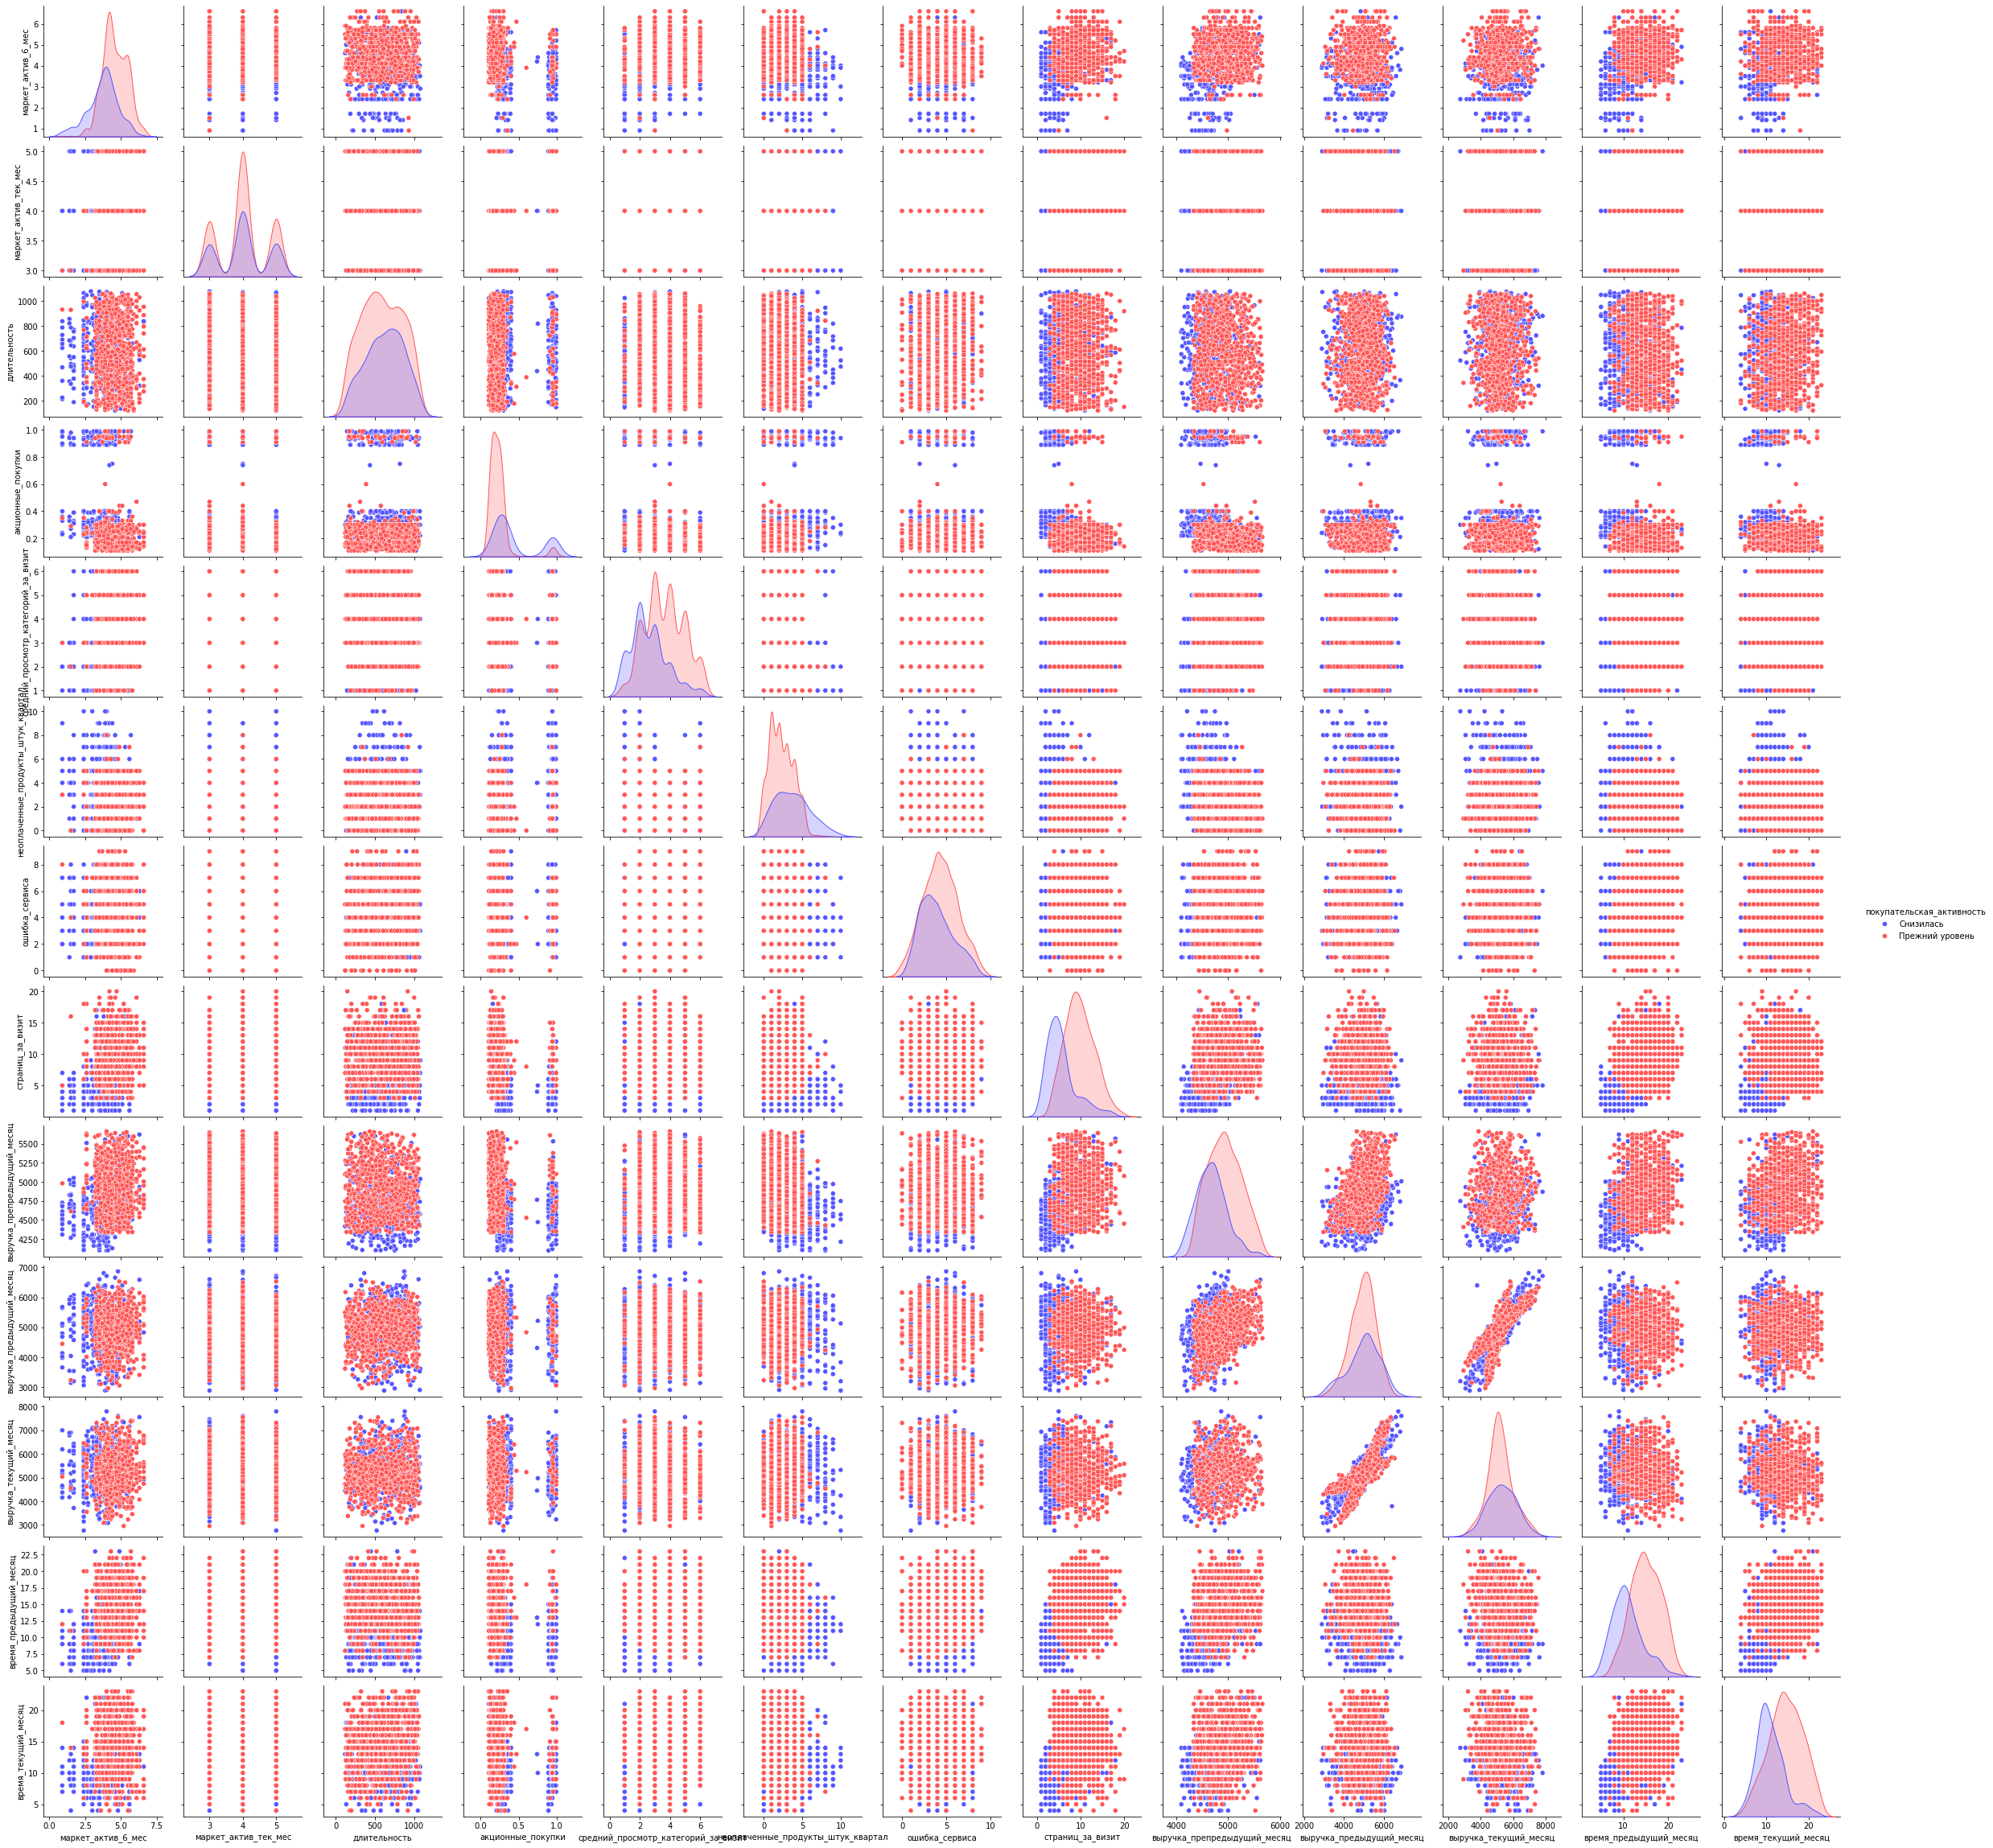

In [80]:
plt.figure(figsize=(30, 30))
sns.pairplot(data=market_df.drop(columns=['id'], axis=1), hue ='покупательская_активность', palette='seismic')
plt.legend=True
plt.show(close=None, block=None);

Из матрицы видно, что существует линейная связь между выручкой текущего месяца и выручкой предыдущего месяца, что еще раз подтверждает данные матрицы Phi-K корреляции. Однако у этих двух признаков VIF < 5, что говорит о минимальной мультиколлинеарности.

Выводы:

По итогам корреляционного анализа выявлено следующее:  

- У целевого показателя 'покупательская активность' наблюдается достаточно существеная корреляция со средним количеством страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца - коэффициент 0,75, умеренная - со временем на сайте за предыдущий месяц (0,6), временем на сайте за текущий месяц (0,57). Из этого можно сделать вывод, что чем больше времени покупатель проводит на сайте и просматривает большее количество страниц, тем более увеличивается его покупательская активность.  


- С такими признаками как` маркет_актив_6_мес`, `средний_просмотр_категорий_за_визит`, `акционные_покупки`, `неоплаченные_продукты_штук_квартал`, `выручка_препредыдущий_месяц` прослеживается корреляция умеренная, стремящаяся к слабой.
С остальными признаками корреляция совсем слабая либо отсутствует. В частности, корреляция целевого признака с выручкой в разных периодах находится в интервале от очень слабой до слабой.


- Прослеживается достаточно сильная взаимосвязь между выручкой за предыдущий месяц и выручкой за текущий месяц - коэффициент фи равен 0,84. Однако коэффициент VIF не больше 5.  


- Для всех признаков VIF < 5 - мультиколлениарности нет.



## Использование пайплайнов

Подготовим данные.

In [81]:
market_df = market_df.set_index('id')

In [82]:
market_df.head()

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
215353                 Снизилась    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        акционные_покупки популярная_категория  \
id                                               
215349               0.75     Товары для детей   
215350               0.14    Домашний текстиль   
215351               0.99     Товары для детей   
215352               0.94     Товары для детей   
215353               0.26    Домашний текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_препредыдущий_месяц  выручка_предыдущий_месяц  \
id                                                              
215349                       4472.0                    5216.0   
215350                       4826.0                    5457.5   
215351                       4793.0                    6158.0   
215352                       4594.0                    5807.5   
215353                       5124.0                    4738.5   

        выручка_текущий_месяц  время_предыдущий_месяц  время_текущий_месяц  
id                                                                          
215349                 4971.6                      12                   10  
215350                 5058.4                       8                   13  
215351                 6610.4                      11                   13  
215352                 5872.5                       8                   11  
215353                 5388.5                      10                   10

In [83]:
# Зададим значения RANDOM_STATE и TEST_SIZE
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    market_df.drop(['покупательская_активность'], axis=1),
    market_df['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_df['покупательская_активность']
)


In [84]:
data_shape = {'Выборка': ['X_train', 'X_test', 'y_train', 'y_test'], 
            'Размер': [X_train.shape, X_test.shape, y_train.shape, y_test.shape]}

display(pd.DataFrame(data_shape))

Выборка     Размер
0  X_train  (972, 16)
1   X_test  (325, 16)
2  y_train     (972,)
3   y_test     (325,)

In [85]:
# Кодируем целевой признак
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [86]:
for i, item in enumerate(label_encoder.classes_):
    print(item, '-->', i)

Прежний уровень --> 0
Снизилась --> 1


In [87]:
# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 
               'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 
               'страниц_за_визит', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 
               'выручка_текущий_месяц', 'время_предыдущий_месяц', 'время_текущий_месяц']
    


In [88]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False)
        )
    ]
)



In [89]:
# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='error'
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 



In [90]:
# Создадим общай пайплайн для предобработки
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),  # Пайплайн для категориальных признаков
        ('ord', ord_pipe, ord_columns),  # Пайплайн для порядковых признаков
        ('num', MinMaxScaler(), num_columns) 
    ], 
    remainder='passthrough'
)

In [91]:
data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['разрешить_сообщать',
                                  'популярная_категория']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  Ordin...
                                 ['тип_сервиса']),
                                ('num', MinMaxScaler(),
                                 ['маркет_актив_6_мес', 'маркет_актив_тек_мес',
                                  'длительность', 'акционные_покупки',
                                  'средний_просмотр_категорий_за_визит',
                                  'неоплаченные_продукты_штук_квартал',
                                  'ошибка_сервиса', 'страниц_за_визит',
                                  'выручка_препредыдущий_месяц',
                                  'выручка_предыдущий_месяц',
                                  'выручка_текущий_месяц',
                                  'время_предыдущий_месяц',
                                  'время_текущий_месяц'])])

In [92]:
# Создадим итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [93]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']    
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty=['l1', 'l2', 'elasticnet', None])],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True, kernel='poly')],
        'models__C': [0.001, 0.01, 0.1, 1, 10],
        'models__gamma': ['scale', 'auto'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'] 
    }
]

In [94]:
# Поиск гиперпараметров с использованием RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [95]:
randomized_search.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/conda/lib/python3.9/

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse_output=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer...
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        probability=True,
                                                        random_state=42)],
                                         'models__C': [0.001, 0.01, 0.1, 1, 10],
                                         'models__gamma': ['scale', 'auto'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [96]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Лучшие значения параметров: {}'.format(randomized_search.best_params_))
print('Метрика лучшей модели по кросс-валидацинной выборке:', round(randomized_search.best_score_, 2))
print(f'Точность на тесте: {randomized_search.score(X_test, y_test):.2f}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                            

In [97]:
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba[:,1]), 2)}')


Метрика ROC-AUC на тестовой выборке: 0.92


**Выводы:**

На данном этапе исследования была осуществлена подготовка данных и проведено обучение нескольких моделей с использованием пайплайнов.  

- Подбор лучших гиперпараметров осуществлялся с помощью рандомизированного поиска RandomizedSearchCV.


- Для кодирования целевого признака Покупательская активность использовался LabelEncoder.


- Для предобработки количественных признаков модели лучше всего показал себя MinMaxScaler().  


- Для предобработки категориальных признаков использовался OrdinalEncoder и OheHotEncoder.  


- Для оценки качества модели была выбрана метрика ROC-AUC, обладающая рядом преимуществ: она учитывает работу модели при всех возможных значениях порогов и поэтому не зависит от одного конкретного, а также эту метрику можно использовать в случае, когда объектов с одним значением целевого признака больше, чем с другими, что и имеет место в нашем случае: пользователей с прежним уровнем покупательской активности больше, чем со сниженным уровнем. 


- Лучше всего показала себя модель SVC со следующими гиперпараметрами: ((C=1, kernel='poly', probability=True, random_state=42).  


- Метрика ROC-AUC на тестовой выборке составила 0.92.


## Анализ важности признаков

In [98]:
X_train_shap = pd.DataFrame(pipe_final.named_steps['preprocessor'].fit_transform(X_train), 
                            columns=pipe_final.named_steps['preprocessor'].get_feature_names_out())

X_test_shap = pd.DataFrame(pipe_final.named_steps['preprocessor'].transform(X_test), 
                           columns=pipe_final.named_steps['preprocessor'].get_feature_names_out())

explainer = shap.KernelExplainer(randomized_search.best_estimator_.named_steps['models'].predict_proba, X_train_shap[:100])
shap_values = explainer(X_test_shap[:100])

  0%|          | 0/100 [00:00<?, ?it/s]

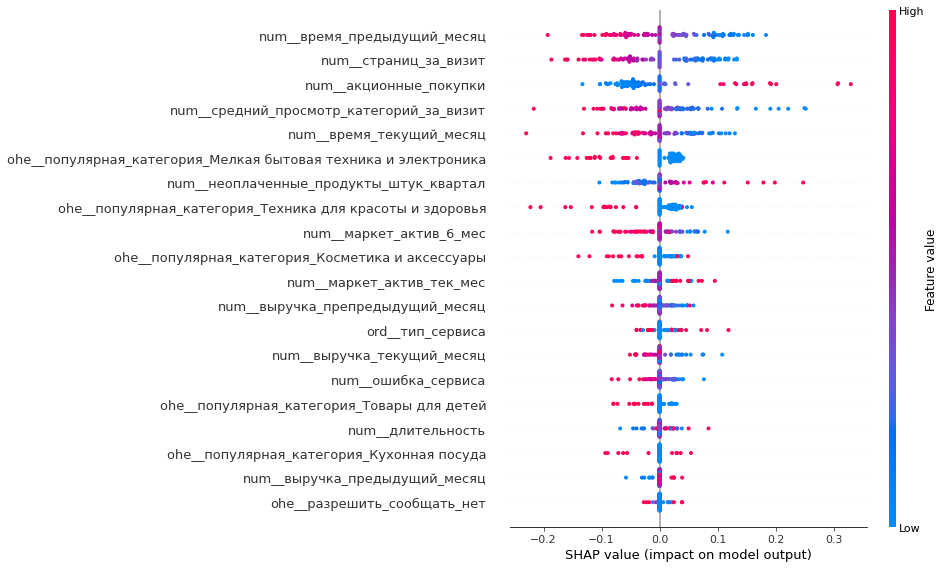

In [99]:

shap.plots.beeswarm(shap_values[:,:,1], max_display=20) 



`beeswarm` показыват общю важность признаков модели по значениям Шепли, присвоенным всем наблюдениям в выборке.

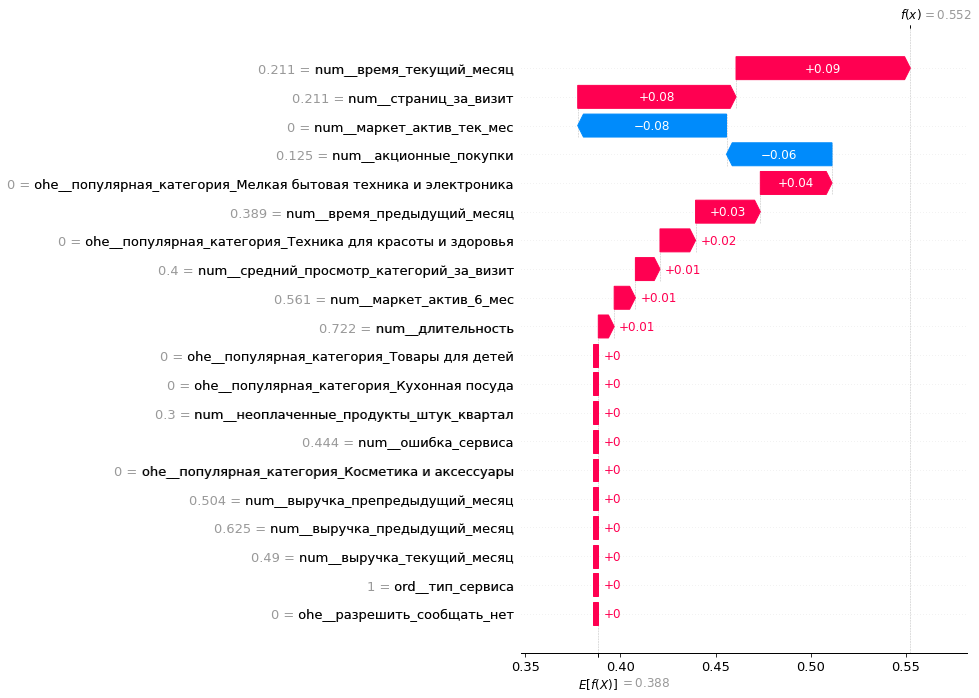

In [100]:
shap.plots.waterfall(shap_values[1,:,1], max_display=20)

`waterfall` визуализирует индивидуальные SHAP-значения отдельных наблюдений в датасете.

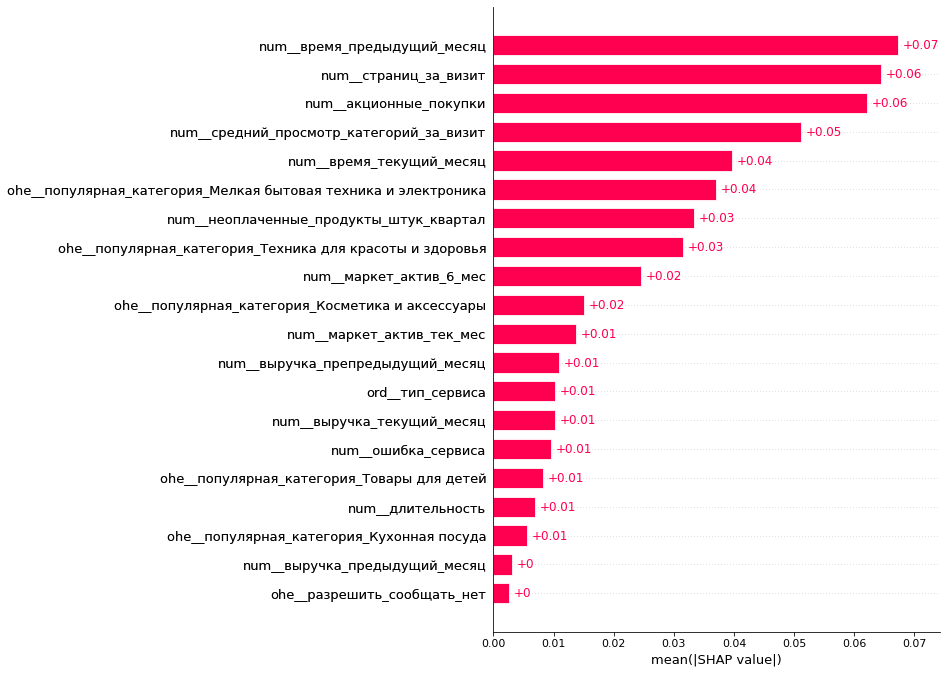

In [101]:
shap.plots.bar(shap_values[:,:,1], max_display=20)


`bar` отражает агрегированный вклад признаков в прогнозы модели.

**Выводы:**  

Наиболее важными с точки зрения модели признаками оказались следующие (в порядке уменьшения важности):

- `время предыдущий месяц`— значение времени, проведённого на сайте, в минутах в предыдущий месяц - низкие значения этого признака увеличивают SHAP значения, что указывает на увеличение вероятности снижения покупательной активности: чем меньше времени покупатель провел на сайте, тем больше шанс снижения активности; 
- `страницы за визит` - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца: чем меньше страниц за визит посетит пользователь, тем выше вероятность того, что его покупательная активность снизится; 

- `акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев: высокие значения этого признака увеличивают SHAP значения и, следовательно, увеличивают вероятность того, что покупательная активность снизится, иными словами, чем больше доля акционных покупок, совершенных покупателем, тем больше вероятность снижения активности; 

- `средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца: низкие значения этого признака увеличивают SHAP значения, что указывает на увеличение вероятности снижения покупательной активности. То есть, чем меньше категорий пользователь смотрит за визит, тем выше вероятность того, что его покупательная активность снизится;  

- `время текущий месяц` — значение времени, проведённого на сайте, в минутах в текущий месяц - чем меньше времени проведено на сайте, тем выше вероятность снижения активности;  

- `популярная категория Мелкая бытовая техника и электроника` - самая популярная категория товаров у покупателя за последние 6 месяцев: высокие значения этого признака уменьшают вероятность снижения покупательской активности;  

- `неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца: чем больше неоплаченных продуктов в корзине покупателя, тем выше вероятность снижения его активности;  


- `популярная категория Техника для красоты и здоровья` - самая популярная категория товаров у покупателя за последние 6 месяцев: высокие значения этого признака уменьшают вероятность снижения покупательской активности;  

- `маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента
: чем меньше рекламы и рассылок получает пользователь, тем больше вероятность снижения его активности.

Влияние остальных признаков менее выражено.

Таким образом, покупатель, у которого снизилась покупательская активность:

- проводит мало времени на сайте в прошлом и текущем месяце
- посещает мало страниц сайта
- имеет высокую долю акционных покупок
- смотрит меньше категорий товаров за визит
- имеет много неоплаченных продуктов за квартал
- получает мало рекламных рассылок и предложений

Можно также сказать, что для модели наиболее важными признаками оказались те, которые характеризуют взаимодействие покупателя с сайтом - время проведенное на сайте, количество открытых страниц, количество просмотренных категорий.

С точки зрения модели пользователь получающий мало рекламных рассылок и предложений также склонен к снижению активности. Возможно, что нужно как-то пытаться заинтересовать пользователей чтобы они возвращались на сайт за покупками.

Следующие по важности признаки касаются покупок пользователей - покупки по акции, неоплаченные покупки, популярные категории.


## Сегментация покупателей

**Объединим данные**

In [102]:
market_df.head()

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
215353                 Снизилась    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        акционные_покупки популярная_категория  \
id                                               
215349               0.75     Товары для детей   
215350               0.14    Домашний текстиль   
215351               0.99     Товары для детей   
215352               0.94     Товары для детей   
215353               0.26    Домашний текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_препредыдущий_месяц  выручка_предыдущий_месяц  \
id                                                              
215349                       4472.0                    5216.0   
215350                       4826.0                    5457.5   
215351                       4793.0                    6158.0   
215352                       4594.0                    5807.5   
215353                       5124.0                    4738.5   

        выручка_текущий_месяц  время_предыдущий_месяц  время_текущий_месяц  
id                                                                          
215349                 4971.6                      12                   10  
215350                 5058.4                       8                   13  
215351                 6610.4                      11                   13  
215352                 5872.5                       8                   11  
215353                 5388.5                      10                   10

In [103]:
market_df.shape

(1297, 17)

In [104]:
money.head()

id  прибыль
1  215349   4160.0
2  215350   3130.0
3  215351   4870.0
4  215352   4210.0
5  215353   3950.0

In [105]:
money.shape

(1297, 2)

In [106]:
money.set_index('id', inplace=True)

In [107]:
# Проверим
money.head()

прибыль
id             
215349   4160.0
215350   3130.0
215351   4870.0
215352   4210.0
215353   3950.0

In [108]:
market_full = market_df.copy() 

In [109]:
# Добавим результаты моделирования
market_full['прогноз'] = randomized_search.best_estimator_.predict_proba(market_df)[:,1]


In [110]:
market_full.head()

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
215353                 Снизилась    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        акционные_покупки популярная_категория  \
id                                               
215349               0.75     Товары для детей   
215350               0.14    Домашний текстиль   
215351               0.99     Товары для детей   
215352               0.94     Товары для детей   
215353               0.26    Домашний текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_препредыдущий_месяц  выручка_предыдущий_месяц  \
id                                                              
215349                       4472.0                    5216.0   
215350                       4826.0                    5457.5   
215351                       4793.0                    6158.0   
215352                       4594.0                    5807.5   
215353                       5124.0                    4738.5   

        выручка_текущий_месяц  время_предыдущий_месяц  время_текущий_месяц  \
id                                                                           
215349                 4971.6                      12                   10   
215350                 5058.4                       8                   13   
215351                 6610.4                      11                   13   
215352                 5872.5                       8                   11   
215353                 5388.5                      10                   10   

         прогноз  
id                
215349  0.924704  
215350  0.468530  
215351  0.990013  
215352  0.982926  
215353  0.694969

In [111]:
# Объединим с 'money'
market_full = market_full.join(money, how = 'inner')
market_full.head()

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
215353                 Снизилась    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        акционные_покупки популярная_категория  \
id                                               
215349               0.75     Товары для детей   
215350               0.14    Домашний текстиль   
215351               0.99     Товары для детей   
215352               0.94     Товары для детей   
215353               0.26    Домашний текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_препредыдущий_месяц  выручка_предыдущий_месяц  \
id                                                              
215349                       4472.0                    5216.0   
215350                       4826.0                    5457.5   
215351                       4793.0                    6158.0   
215352                       4594.0                    5807.5   
215353                       5124.0                    4738.5   

        выручка_текущий_месяц  время_предыдущий_месяц  время_текущий_месяц  \
id                                                                           
215349                 4971.6                      12                   10   
215350                 5058.4                       8                   13   
215351                 6610.4                      11                   13   
215352                 5872.5                       8                   11   
215353                 5388.5                      10                   10   

         прогноз  прибыль  
id                         
215349  0.924704   4160.0  
215350  0.468530   3130.0  
215351  0.990013   4870.0  
215352  0.982926   4210.0  
215353  0.694969   3950.0

In [112]:
market_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 215349 to 216647
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1297 non-null   object 
 1   тип_сервиса                          1297 non-null   object 
 2   разрешить_сообщать                   1297 non-null   object 
 3   маркет_актив_6_мес                   1297 non-null   float64
 4   маркет_актив_тек_мес                 1297 non-null   int64  
 5   длительность                         1297 non-null   int64  
 6   акционные_покупки                    1297 non-null   float64
 7   популярная_категория                 1297 non-null   object 
 8   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 10  ошибка_сервиса                       1297 non-null   int64  
 11  страниц_за_визит       

In [113]:
# Проверим наличие пропусков в market_df
market_full.isna().sum()

покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_препредыдущий_месяц            0
выручка_предыдущий_месяц               0
выручка_текущий_месяц                  0
время_предыдущий_месяц                 0
время_текущий_месяц                    0
прогноз                                0
прибыль                                0
dtype: int64

In [114]:
# Проверим наличие дубликатов в market_df
market_full.duplicated().sum()

0

Пропусков и дубликатов нет.

**Группа покупателей с сервисом Премиум и высокой вероятностью снижения покупательской активности**

In [115]:
#market_full.query('тип_сервиса == "премиум" and прогноз > 0.75').shape

 В данный сегмент попадают 134 покупателя.

In [126]:
market_full['группы'] = market_full\
.apply( lambda row: 'сегмент' \
        if row['прогноз'] > 0.75 and row['тип_сервиса']=='премиум' \
        else 'остальные' \
      , axis=1)

In [127]:
market_full.head(10)

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
215353                 Снизилась    стандарт                 да   
215354                 Снизилась    стандарт                 да   
215355                 Снизилась    стандарт                нет   
215356                 Снизилась    стандарт                 да   
215358                 Снизилась    стандарт                 да   
215360                 Снизилась     премиум                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   
215354                 5.1                     3           431   
215355                 4.7                     4           284   
215356                 4.2                     4           192   
215358                 4.7                     4           450   
215360                 3.9                     3           623   

        акционные_покупки    популярная_категория  \
id                                                  
215349               0.75        Товары для детей   
215350               0.14       Домашний текстиль   
215351               0.99        Товары для детей   
215352               0.94        Товары для детей   
215353               0.26       Домашний текстиль   
215354               0.23  Косметика и аксесcуары   
215355               0.17        Товары для детей   
215356               0.14  Косметика и аксесcуары   
215358               0.13       Домашний текстиль   
215360               0.35         Кухонная посуда   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   
215354                                    2   
215355                                    5   
215356                                    2   
215358                                    4   
215360                                    3   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   
215354                                   3               7                 2   
215355                                   1               6                 4   
215356                                   2               1                 3   
215358                                   2               6                 4   
215360                                   1               4                 7   

        выручка_препредыдущий_месяц  выручка_предыдущий_месяц  \
id                                                              
215349                       4472.0                    5216.0   
215350                       4826.0                

**Исследование группы покупателей**

Основные показатели описательной статистики для покупателей из сегмента и остальных покупателей

In [118]:
market_full.query('группы == "остальные"').describe().round(2).T

count     mean      std      min  \
маркет_актив_6_мес                   1163.0     4.34     0.97     0.90   
маркет_актив_тек_мес                 1163.0     4.01     0.69     3.00   
длительность                         1163.0   589.01   249.49   121.00   
акционные_покупки                    1163.0     0.30     0.23     0.11   
средний_просмотр_категорий_за_визит  1163.0     3.36     1.35     1.00   
неоплаченные_продукты_штук_квартал   1163.0     2.71     1.89     0.00   
ошибка_сервиса                       1163.0     4.18     1.95     0.00   
страниц_за_визит                     1163.0     8.58     3.96     1.00   
выручка_препредыдущий_месяц          1163.0  4858.50   335.53  4098.00   
выручка_предыдущий_месяц             1163.0  4926.53   684.27  2890.00   
выручка_текущий_месяц                1163.0  5209.13   823.43  2952.20   
время_предыдущий_месяц               1163.0    13.94     3.80     5.00   
время_текущий_месяц                  1163.0    13.60     4.18     4.00   
прогноз                              1163.0     0.32     0.30     0.00   
прибыль                              1163.0  3998.42  1005.23   860.00   

                                         25%      50%      75%      max  
маркет_актив_6_мес                      3.90     4.30     5.00     6.60  
маркет_актив_тек_мес                    4.00     4.00     4.00     5.00  
длительность                          387.50   591.00   788.50  1079.00  
акционные_покупки                       0.16     0.24     0.30     0.99  
средний_просмотр_категорий_за_визит     2.00     3.00     4.00     6.00  
неоплаченные_продукты_штук_квартал      1.00     2.00     4.00    10.00  
ошибка_сервиса                          3.00     4.00     5.00     9.00  
страниц_за_визит                        6.00     8.00    11.00    20.00  
выручка_препредыдущий_месяц          4607.00  4833.00  5101.00  5663.00  
выручка_предыдущий_месяц             4493.75  4988.00  5371.75  6809.00  
выручка_текущий_месяц                4685.40  5149.20  5690.50  7799.40  
время_предыдущий_месяц                 11.00    14.00    17.00    23.00  
время_текущий_месяц                    10.00    13.00    17.00    23.00  
прогноз                                 0.08     0.22     0.49     1.00  
прибыль                              3305.00  4050.00  4685.00  7210.00

In [128]:
market_full.query('группы == "сегмент"').describe().round(2).T

count     mean      std      min  \
маркет_актив_6_мес                   134.0     3.49     1.06     0.90   
маркет_актив_тек_мес                 134.0     4.01     0.72     3.00   
длительность                         134.0   724.32   210.47   187.00   
акционные_покупки                    134.0     0.52     0.31     0.12   
средний_просмотр_категорий_за_визит  134.0     2.45     1.04     1.00   
неоплаченные_продукты_штук_квартал   134.0     3.99     2.28     0.00   
ошибка_сервиса                       134.0     4.23     2.00     1.00   
страниц_за_визит                     134.0     4.76     1.95     1.00   
выручка_препредыдущий_месяц          134.0  4644.32   241.55  4119.00   
выручка_предыдущий_месяц             134.0  5137.62   812.66  2909.00   
выручка_текущий_месяц                134.0  5491.89   884.48  2758.70   
время_предыдущий_месяц               134.0     9.43     2.51     5.00   
время_текущий_месяц                  134.0     9.81     2.78     4.00   
прогноз                              134.0     0.90     0.08     0.76   
прибыль                              134.0  3990.60  1061.94  1330.00   

                                         25%      50%      75%      max  
маркет_актив_6_мес                      2.90     3.55     4.10     5.70  
маркет_актив_тек_мес                    3.25     4.00     5.00     5.00  
длительность                          561.00   759.00   874.50  1076.00  
акционные_покупки                       0.28     0.35     0.93     0.99  
средний_просмотр_категорий_за_визит     2.00     2.00     3.00     6.00  
неоплаченные_продукты_штук_квартал      2.00     4.00     5.00    10.00  
ошибка_сервиса                          3.00     4.00     6.00     9.00  
страниц_за_визит                        3.00     5.00     6.00    12.00  
выручка_препредыдущий_месяц          4466.75  4647.00  4820.00  5555.00  
выручка_предыдущий_месяц             4742.62  5252.25  5761.50  6869.50  
выручка_текущий_месяц                4906.22  5540.70  6128.60  7605.30  
время_предыдущий_месяц                  8.00     9.50    11.00    18.00  
время_текущий_месяц                     8.00     9.00    11.00    19.00  
прогноз                                 0.84     0.91     0.98     1.00  
прибыль                              3210.00  3990.00  4657.50  7430.00

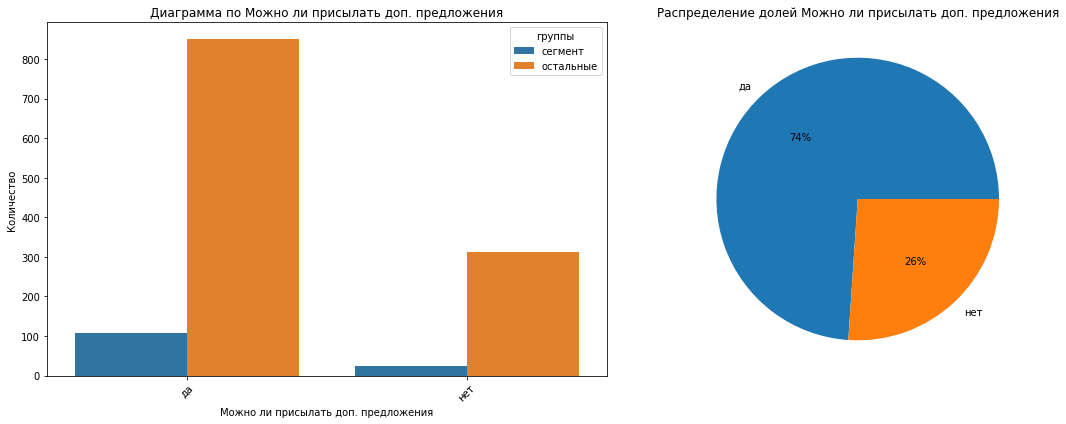

In [130]:
# Построим графики для столбца `разрешить_сообщать'
cat_plot(market_full, 'разрешить_сообщать', 'Можно ли присылать доп. предложения', 'группы') 


Несколько больше пользователей из сегмента согласно на получение дополнительных предложений, чем не согласно.

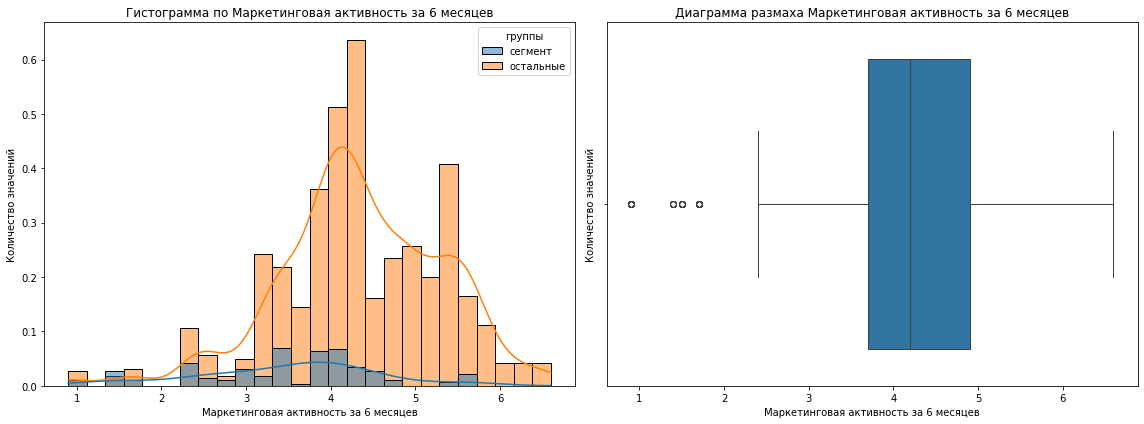

In [131]:
# Построим графики для столбца `маркет_актив_6_мес`
num_plot(market_full, 'маркет_актив_6_мес', 'Маркетинговая активность за 6 месяцев', 'Количество значений', 'группы')

Покупатели с сервисом Премиум за 6 месяцев получили меньше рассылок, чем все остальные. Возможно стоит увеличить количество этих рассылок.

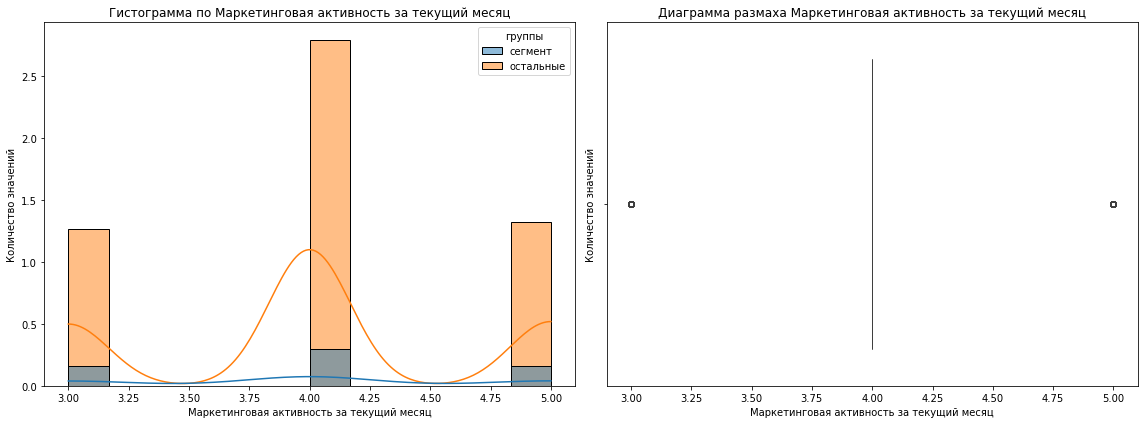

In [132]:
# Построим графики для столбца `маркет_актив_тек_мес`
num_plot(market_full, 'маркет_актив_тек_мес', 'Маркетинговая активность за текущий месяц', 'Количество значений', 'группы')

За текущий месяц маркетинговая активность примерно одинаковая для обех групп пользователей. 

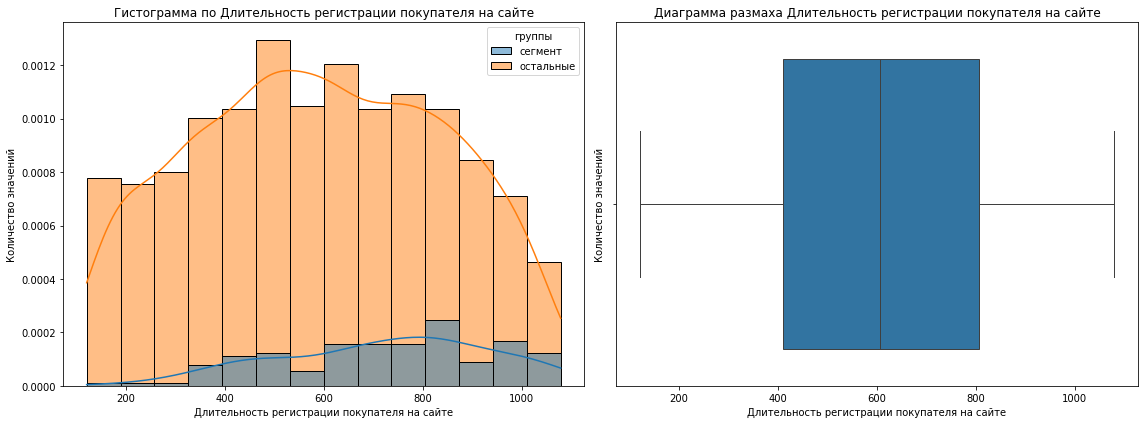

In [133]:
# Построим графики для столбца `длительность`
num_plot(market_full, 'длительность', 'Длительность регистрации покупателя на сайте', 'Количество значений', 'группы')

У большего количества Премиум-пользователей более долгая регистрация на сайте, чем у остальнных пользователей. 

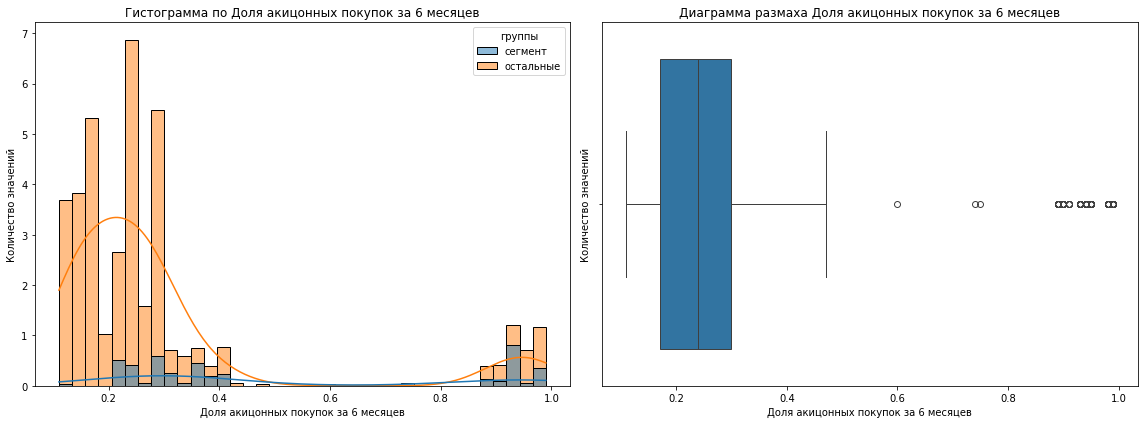

In [134]:
# Построим графики для столбца `акционные_покупки`
num_plot(market_full, 'акционные_покупки', 'Доля акицонных покупок за 6 месяцев', 'Количество значений', 'группы')

Распределение примерно одинаковое для обеих групп пользователей.

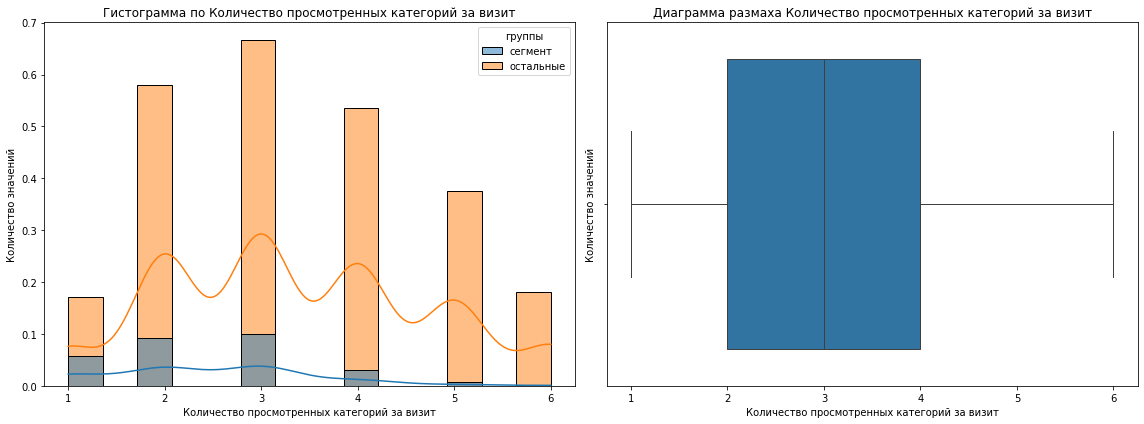

In [135]:
# Построим графики для столбца `средний_просмотр_категорий_за_визит`
num_plot(market_full, 'средний_просмотр_категорий_за_визит', 'Количество просмотренных категорий за визит', 'Количество значений', 'группы')

Пользователи с сервисом Премиум смотрят в основном за визит 1-3 категории, остальные 2-5. 

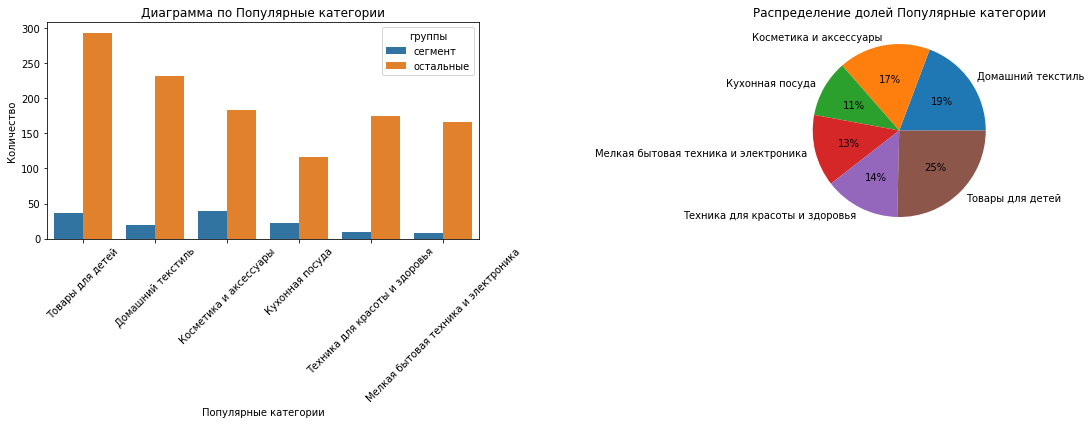

In [136]:
# Построим графики для столбца `популярная_категория'
cat_plot(market_full, 'популярная_категория', 'Популярные категории', 'группы') 

Видим, что распределение популярных категорий у обладателей сервиса Премиум и остальных пользователей разное. У пользователей с сервисом Премиум самой популярной категорией является косметика и аксессуары, и немного отстают товары для детей, а у остальных - детские товары. Возможно имеет смысл увеличить маркетинговую активность по обоим видам товаров.

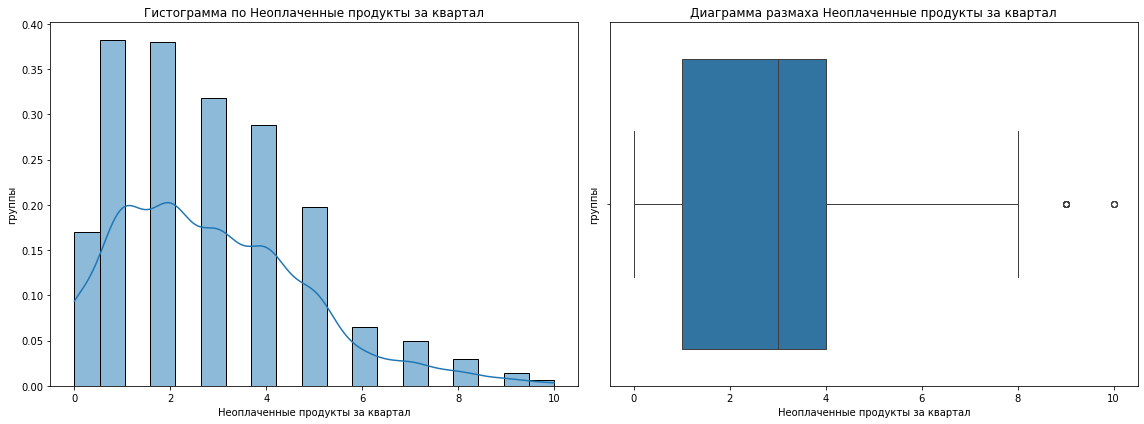

In [137]:
# Построим графики для столбца `неоплаченные_продукты_штук_квартал`
num_plot(market_full, 'неоплаченные_продукты_штук_квартал', 'Неоплаченные продукты за квартал', 'группы')

Получается, что неоплаченные товары есть у гораздо большего числа у покупателей из нашего сегмента, чем  остальных.

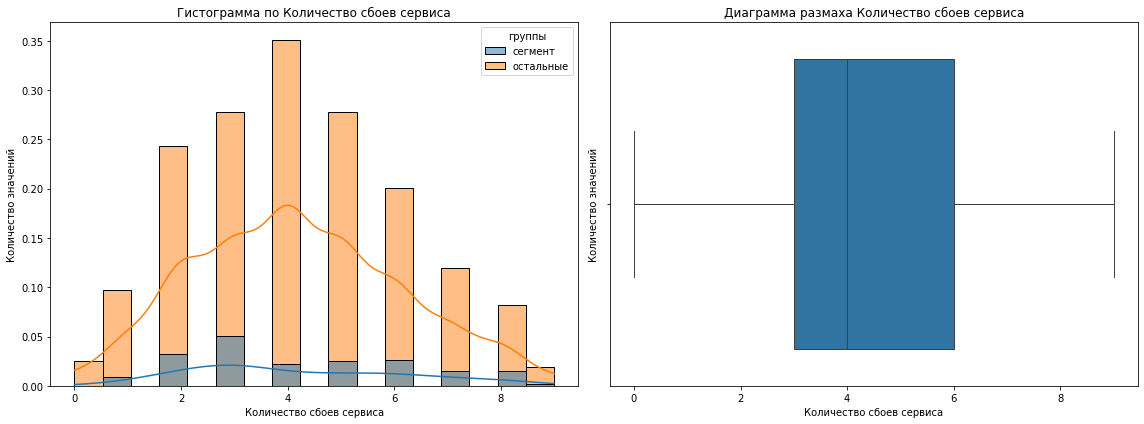

In [138]:
# Построим графики для столбца `ошибка_сервиса`
num_plot(market_full, 'ошибка_сервиса', 'Количество сбоев сервиса', 'Количество значений', 'группы')

Для покупателей из нашего сегмента большее количество сбоев 3, для остальных 4.

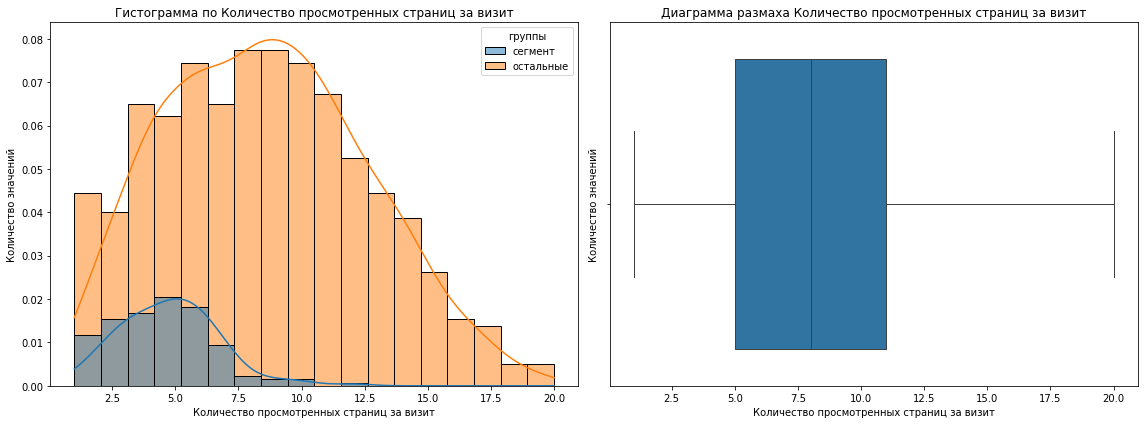

In [139]:
# Построим графики для столбца `страниц_за_визит`
num_plot(market_full, 'страниц_за_визит', 'Количество просмотренных страниц за визит', 'Количество значений', 'группы')

Покупатели с Премиум сервисом смотрят меньше страниц  за визит.

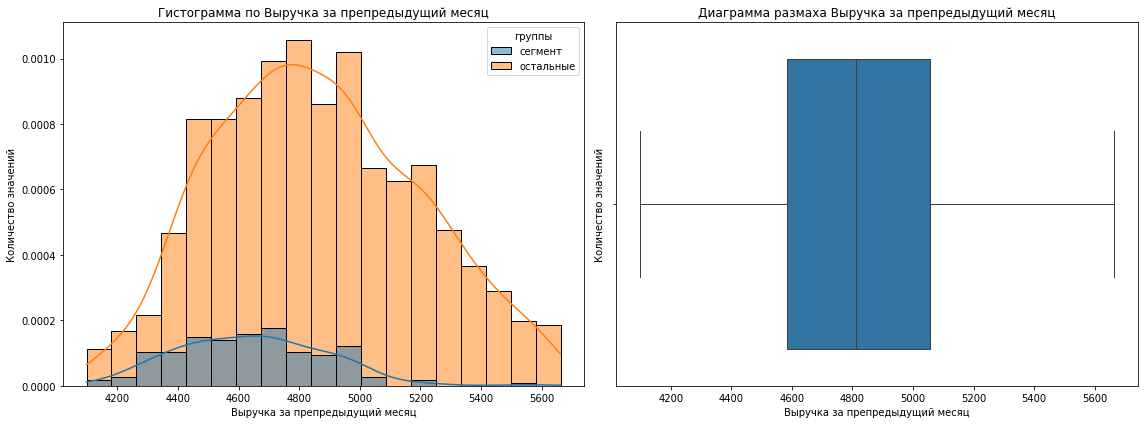

In [140]:
# Построим графики для столбца `выручка_препредыдущий_месяц`
num_plot(market_full, 'выручка_препредыдущий_месяц', 'Выручка за препредыдущий месяц', 'Количество значений', 'группы')

Выручка 2 месяца назад по покупателям с сервисом Премиум была меньше, чем по остальным.

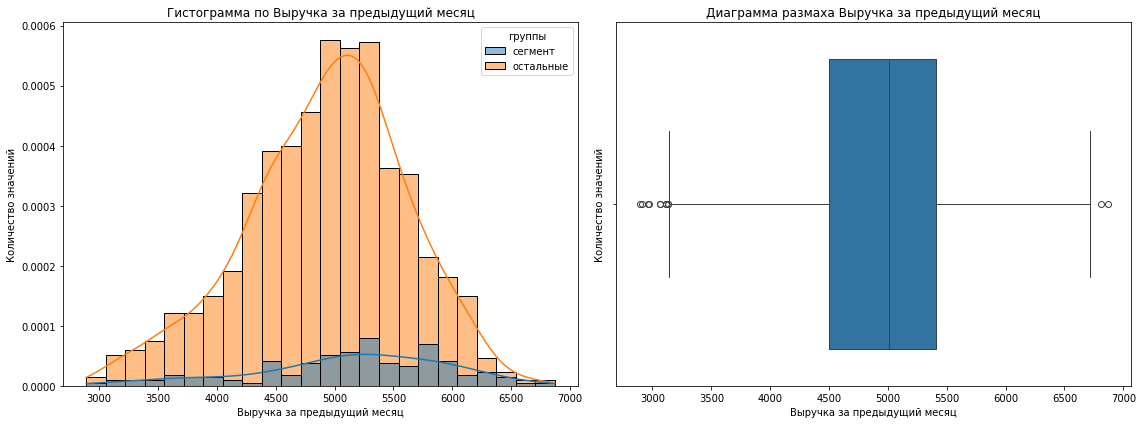

In [141]:
# Построим графики для столбца `выручка_предыдущий_месяц`
num_plot(market_full, 'выручка_предыдущий_месяц', 'Выручка за предыдущий месяц', 'Количество значений', 'группы')

Здесь выручка по обеим группам в целом примерно одинакова. 

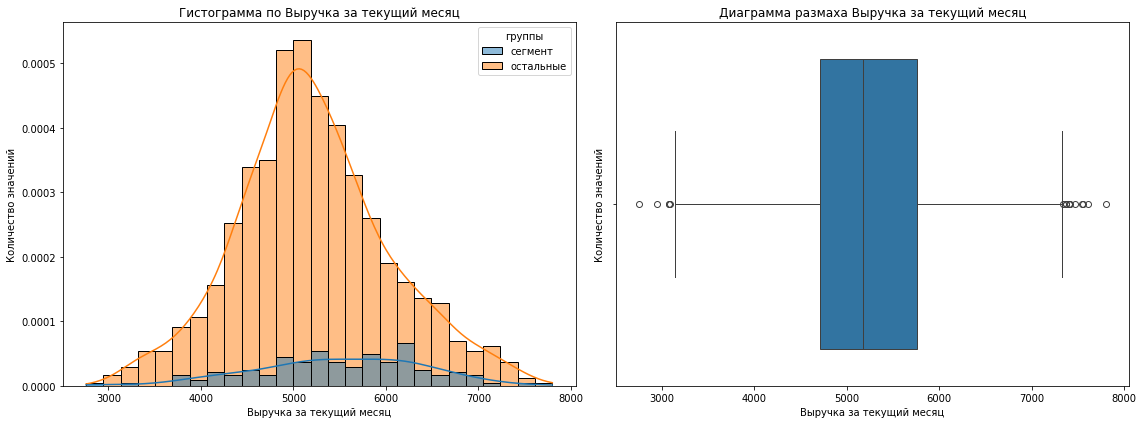

In [142]:
# Построим графики для столбца `выручка_текущий_месяц`
num_plot(market_full, 'выручка_текущий_месяц', 'Выручка за текущий месяц', 'Количество значений', 'группы')

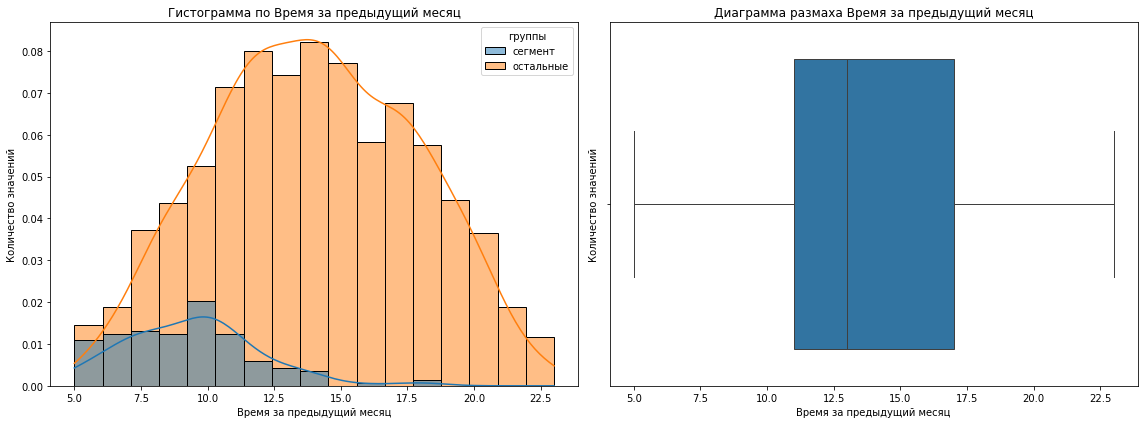

In [143]:
# Построим графики для столбца `время_предыдущий_месяц`
num_plot(market_full, 'время_предыдущий_месяц', 'Время за предыдущий месяц', 'Количество значений', 'группы')

Время, проведенное на сайте у покупателей с сервисом Премиум меньше, чем у остальных пользователей, возмжно из-за того, что они получают быструю навигацию и приоритетную поддержку.

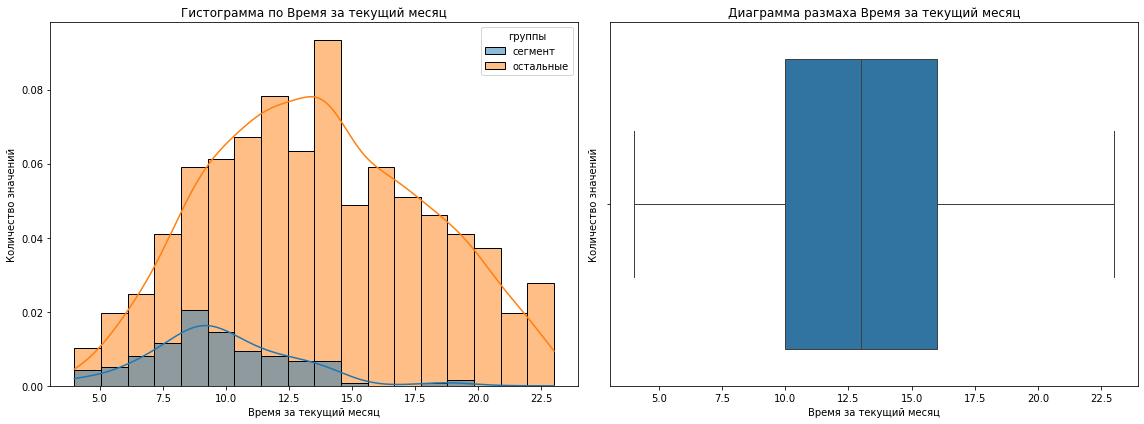

In [144]:
# Построим графики для столбца `время_текущий_месяц`
num_plot(market_full, 'время_текущий_месяц', 'Время за текущий месяц', 'Количество значений', 'группы')

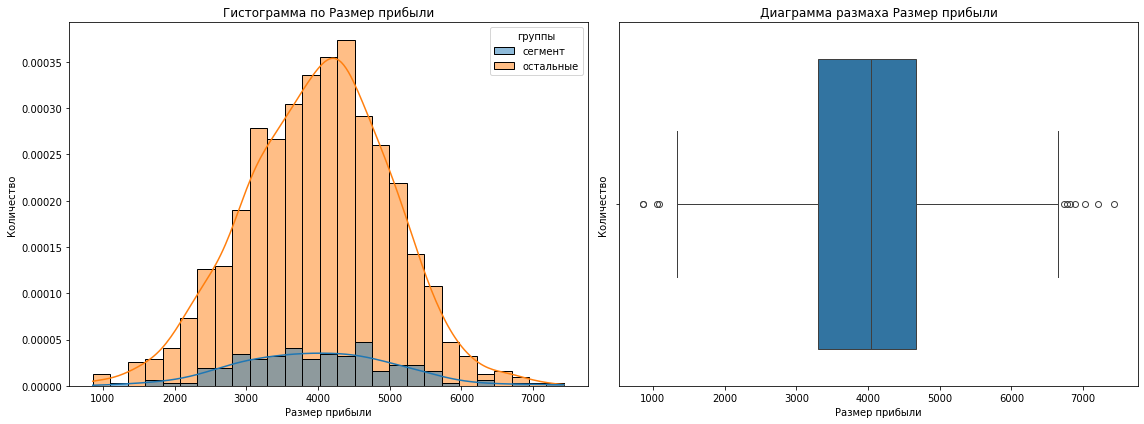

In [145]:
# Построим графики для столбца `прибыль`
num_plot(market_full, 'прибыль', 'Размер прибыли', 'Количество', 'группы')

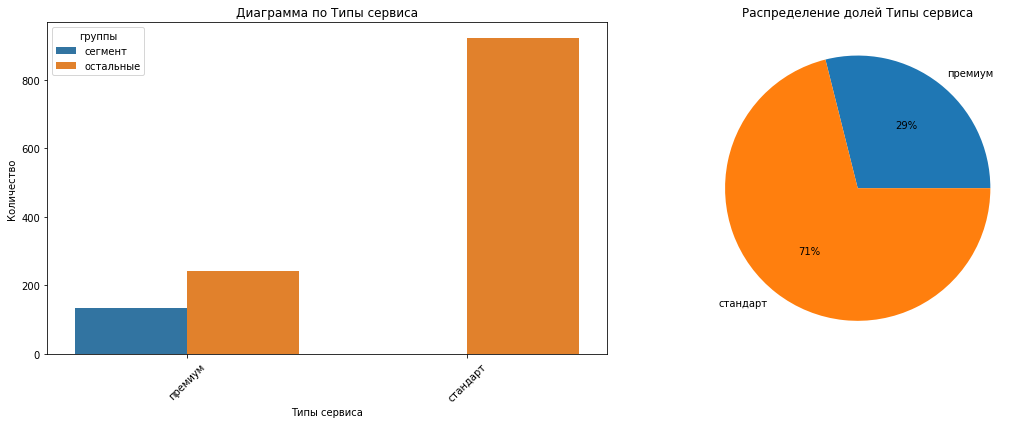

In [146]:
# Построим графики для столбца `тип_сервиса`
cat_plot(market_full, 'тип_сервиса', 'Типы сервиса', 'группы') 

**Выводы:**  

Сравнение показателей по выбранному сегменту покупателей (покупатели с сервисом Премиум и высокой вероятностью снижения покупательской активности) и по остальным покупателям показывает следующее:  

- Несколько больше пользователей из сегмента согласно на получение дополнительных предложений, чем не согласно.  

- Покупатели с сервисом Премиум за 6 месяцев получили меньше рассылок, чем все остальные: в среднем 3,49 у Премиум-пользователей против 4,34 у остальных. Возможно, стоит увеличить количество рассылок для Премиум-пользователей.  

- За текущий месяц маркетинговая активность примерно одинаковая для обех групп пользователей: в среднем по 4,01.  

- Акционные покупки - Распределение примерно одинаковое для обеих групп пользователей.  

- У большего количества Премиум-пользователей более долгая регистрация на сайте, чем у остальнных пользователей: в среднем 724,32 у Премиум-пользователей и 589,01 - у остальных.

- Длительность регистрации на сайте - Значения для обеих групп распределены примерно одинаково. 

- Пользователи с сервисом Премиум смотрят в основном за визит 1-3 категории, остальные 2-5, в среднем 3,36 и 2,45 соответственно.  

- Выручка 2 месяца назад по покупателям с сервисом Премиум была меньше, чем по остальным: в среднем 4644,32 по Премиум и 4858,50 по остальным.  
В предыдущем месяце выручка по обеим группам в целом примерно одинакова, немного больше у Премиум: в среднем 5137,62,  остальных - 4926,53.  
В текущем месяце немного больше у Премиум-пользователей: 5491,89, в то время как  остальных 5209,13.  

- Распределение популярных категорий у обладателей сервиса Премиум и остальных пользователей разное. У пользователей с сервисом Премиум самой популярной категорией является косметика и аксессуары, и немного отстают товары для детей, а у остальных - детские товары. Возможно имеет смысл увеличить маркетинговую активность по обоим видам товаров.  

- Неоплаченные товары есть у гораздо большего числа у покупателей из нашего сегмента, чем остальных: 3,99 против 2,71.

- Покупатели с Премиум сервисом смотрят меньше страниц за визит - 4,76, а остальные - 8,58

- Время, проведенное на сайте у покупателей с сервисом Премиум меньше, чем у остальных пользователей: 
  в среднем в предыдущем месяце у Премиум-пользователей 9,43, а у остальных - 13,94; в текущем месяце - 9,81 и 13,60 соответственно. Возможно, это связано с тем, что они получают быструю навигацию и приоритетную поддержку.  

- Среднемесячная прибыль продавца за последние 3 месяца (какую прибыль получает магазин от продаж каждому покупателю) примерно одинаковая: 3990,60 у Премиум-пользователей и 3998,42 у остальных пользователей.  


## Общий вывод

Основной задачей проекта был поиск решений, которые позволят персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.     Задачей данного иссследования было построение модели, которая бы предсказала уменьшение покупательской активности пользователей интернет-магазина "В один клик".

In [119]:
#print(shap.__version__)
#print(sklearn.__version__)
#print(np.__version__)


In [120]:
#pip install matplotlib==3.3.4

In [121]:
#pip install shap==0.39.0

In [122]:
#%pip install -q missingno phik matplotlib==3.9.4 shap==0.47.2 scikit-learn==1.6.1 seaborn==0.13.2 shap==0.47.2

# !pip install scikit-learn==1.1.3 -q и !pip install matplotlib==3.5.2 -q.




